In [1]:
import dask.dataframe as dd
import re
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.metrics import mean_squared_error
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ptick
import math
from scipy.stats import kruskal
from scipy import stats

from sklearn.linear_model import LinearRegression

from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

from scipy.stats import zscore
import collections

import scikit_posthocs as sp

import statsmodels.api as sm

import matplotlib as mpl

c:\Users\danjp\Documents\NaganoLab\Sim.SamplingStrategy\Code\.venv\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
def ExtractEnvCount_FromALTC(DATAFRAME):
    
    ALTC_List = list(DATAFRAME["ALTC"])

    EnvCount_List = []

    for ALTC in ALTC_List:
        
        EnvCount = re.findall(r"ALTC_(\w+)_\d{3}", ALTC)[0]
        
        EnvCount_List.append(EnvCount)
    
    DATAFRAME["EnvCount"] = EnvCount_List    
        
    return DATAFRAME

# Fig2a , b : Prediction accuracy by sample size

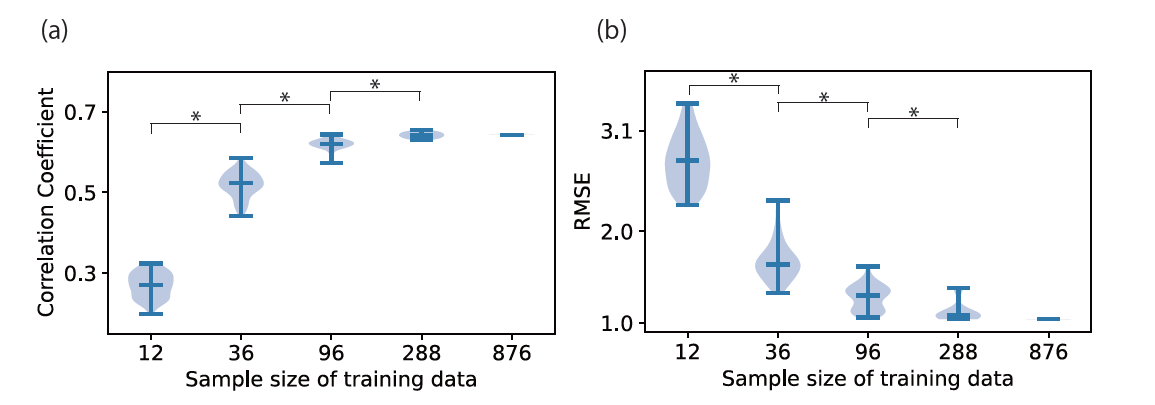

In [ ]:
df_CorrRMSE_Path = r"df_CorrRMSE.csv"

df = dd.read_csv(df_CorrRMSE_Path,assume_missing=True).compute()

df = ExtractEnvCount_FromALTC(df)

In [ ]:
df_gb_CorrMean = df.groupby(["ALTC",'EnvCount'], as_index=False).agg({"Corr" : 'mean' , "RMSE" : "mean"})

In [ ]:
Corr_PlotList = []
RMSE_PlotList = []

for EnvCount in (["1","3","08","08Day","08Night","24","73"]):
    
    df_filter = df_gb_CorrMean[df_gb_CorrMean["EnvCount"] == EnvCount]
    
    Corr_PlotList.append(list(df_filter["Corr"]))
    RMSE_PlotList.append(list(df_filter["RMSE"]))

## Plot Corr

In [ ]:
Corr_PlotList_SampleSize = [(Corr_PlotList[0]) , (Corr_PlotList[1]) , (Corr_PlotList[2]) , (Corr_PlotList[-2]) , (Corr_PlotList[-1])]

fig, ax = plt.subplots(figsize=(5, 3))

ax.violinplot(Corr_PlotList_SampleSize, showmedians=True)

ax.set_title('Sample size and Correlation coefficient', fontsize=10)

plt.ylabel("Correlation Coefficient", fontsize=13)
ax.set_yticks([0.3 , 0.5 , 0.7])
ax.set_ylim(0.15, 0.8)

plt.xlabel("Sample size of training data", fontsize=13)
ax.set_xticks([1, 2, 3 , 4 , 5])
labels = ["12","36","96","288","876"]
ax.set_xticklabels(labels)

plt.tick_params(labelsize=13)

plt.savefig("Fig/Corr_Prediction_Accuracy_by_SampleSize.svg" , dpi = 2000)
plt.show()

### significance test (Corr)

In [ ]:
SampleSize_12to36_Corr_Utest = stats.mannwhitneyu((Corr_PlotList[0]), (Corr_PlotList[1]), alternative='two-sided')
SampleSize_36to96_Corr_Utest = stats.mannwhitneyu((Corr_PlotList[1]), (Corr_PlotList[2]), alternative='two-sided')
SampleSize_96to288_Corr_Utest = stats.mannwhitneyu((Corr_PlotList[2]), (Corr_PlotList[-2]), alternative='two-sided')

print("Mann-Whitney U test with sample sizes of 12 and 36")
print(SampleSize_12to36_Corr_Utest)

print("Mann-Whitney U test with sample sizes of 36 and 96")
print(SampleSize_36to96_Corr_Utest)

print("Mann-Whitney U test with sample sizes of 96 and 288")
print(SampleSize_96to288_Corr_Utest)

In [ ]:
SampleSize_288to876_Corr_Utest = stats.mannwhitneyu((Corr_PlotList[-1]), (Corr_PlotList[-2]), alternative='two-sided')

In [ ]:
print(SampleSize_36to96_Corr_Utest)

In [ ]:
print(SampleSize_288to876_Corr_Utest)

In [ ]:
print(statistics.median(RMSE_PlotList[0]))
print(statistics.median(RMSE_PlotList[-1]))

## Plot RMSE

In [ ]:
RMSE_PlotList_SampleSize = [(RMSE_PlotList[0]) , (RMSE_PlotList[1]) , (RMSE_PlotList[2]) , (RMSE_PlotList[-2]) , (RMSE_PlotList[-1])]

fig, ax = plt.subplots(figsize=(5, 3))
ax.violinplot(RMSE_PlotList_SampleSize, showmedians=True)

ax.set_title('Sample size and RMSE', fontsize=13)

plt.ylabel("RMSE", fontsize=13)
ax.set_yticks([1.0 , 2 , 3.0])
ax.set_ylim(0.9, 3.75)

plt.xlabel("Sample size of training data", fontsize=13)
ax.set_xticks([1, 2, 3 , 4 , 5])
labels = ["12","36","96","288","876"]
ax.set_xticklabels(labels)

plt.tick_params(labelsize=13)

plt.savefig("Fig/RMSE_Prediction_Accuracy_by_SampleSize.svg" , dpi = 2000)
plt.show()

### significance test (RMSE)

In [ ]:
SampleSize_12to36_RMSE_Utest = stats.mannwhitneyu((RMSE_PlotList[0]), (RMSE_PlotList[1]), alternative='two-sided')
SampleSize_36to96_RMSE_Utest = stats.mannwhitneyu((RMSE_PlotList[1]), (RMSE_PlotList[2]), alternative='two-sided')
SampleSize_96to288_RMSE_Utest = stats.mannwhitneyu((RMSE_PlotList[2]), (RMSE_PlotList[-2]), alternative='two-sided')

print("Mann-Whitney U test with sample sizes of 12 and 36")
print(SampleSize_12to36_RMSE_Utest)

print("Mann-Whitney U test with sample sizes of 36 and 96")
print(SampleSize_36to96_RMSE_Utest)

print("Mann-Whitney U test with sample sizes of 96 and 288")
print(SampleSize_96to288_RMSE_Utest)

# Fig3 a Time series plots of genes that consistently succeed in prediction
# Fig3 b Time series plots of genes that consistently fail to predict
# Fig3 c Time series plots of genes that fail to predict late in the time series

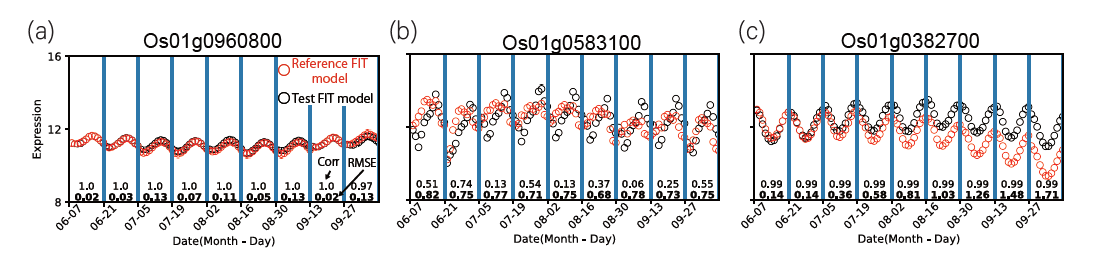

In [ ]:
df_path = r"df_all_fit_filterd.csv"
df = dd.read_csv(df_path , assume_missing = True , dtype={'EnvCount': 'object' , 'Time' : int , 'FIT_Test_Value' : float ,'FIT_Reference_Value' : float}).compute()
df = df[['Time', 'Gene', 'FIT_Test_Value', 'ALTC', 'EnvCount','FIT_Reference_Value']]

In [ ]:
df_Fig3a = df[(df["EnvCount"] == "08") & (df["Gene"] == "Os01g0960800") & (df["ALTC"] == "ALTC_08_001")]
df_Fig3b = df[(df["EnvCount"] == "08") & (df["Gene"] == "Os01g0583100") & (df["ALTC"] == "ALTC_08_001")]
df_Fig3c = df[(df["EnvCount"] == "08") & (df["Gene"] == "Os01g0382700") & (df["ALTC"] == "ALTC_08_001")]

In [ ]:
def Assign_Index(DATAFRAME):
    
    DATAFRAME = DATAFRAME.sort_values('Time')
    Index_List = list(range(1, 109))
    DATAFRAME["Index"] = Index_List
    
    return DATAFRAME

def SliceDataFrame_CalcStats(DATAFRAME , START_INDEX , FINISH_INDEX , STEP):
    
    CorrList_TimeStep = []
    RMSEList_TimeStep = []
    SDList_TimeStep = []
    
    for i in range(START_INDEX , FINISH_INDEX , STEP):
        
        Index_Start = i
        Index_Finish = Index_Start + 12
        
        df_tmp = DATAFRAME.iloc[Index_Start:Index_Finish]
        
        Measurement_List = list(df_tmp["FIT_Reference_Value"])
        Pridict_List = list(df_tmp["FIT_Test_Value"])
        
        Corr = Calc_Corr(df_tmp)
        RMSE = np.sqrt(mean_squared_error(Measurement_List, Pridict_List))
        SD = statistics.stdev(Measurement_List + Pridict_List)
        
        CorrList_TimeStep.append(Corr)
        RMSEList_TimeStep.append(RMSE)
        SDList_TimeStep.append(SD)
    
    return CorrList_TimeStep , RMSEList_TimeStep , SDList_TimeStep

def Rouding_List(LIST,DIGITS):
    
    for i in range(len(LIST)):
        Num = LIST[i]
        
        if (type(Num) is str):
            Num = "Nan"
        else:
            Num = round(Num,DIGITS)
        
        LIST[i] = Num
    
    return LIST

def Calc_Corr(DATAFRAME):
    
    Measurement_List = list(DATAFRAME["FIT_Reference_Value"])
    Pridict_List = list(DATAFRAME["FIT_Test_Value"])

    # Cannot be processed if the variance is zero.
    if (len(set(Measurement_List)) == 1) or (len(set(Pridict_List)) == 1):
        Corr = "Zero_variance"
    else:
        Corr = np.corrcoef(Measurement_List, Pridict_List)[0, 1]

    return Corr

In [ ]:
df_Fig3a = Assign_Index(df_Fig3a)
df_Fig3b = Assign_Index(df_Fig3b)
df_Fig3c = Assign_Index(df_Fig3c)


#List of gene expression levels and indexes for test and reference models
TestFIT_ExpList_Fig3a = list(df_Fig3a["FIT_Test_Value"])
CorrectFIT_ExpList_Fig3a = list(df_Fig3a["FIT_Reference_Value"])

TestFIT_ExpList_Fig3b = list(df_Fig3b["FIT_Test_Value"])
CorrectFIT_ExpList_Fig3b = list(df_Fig3b["FIT_Reference_Value"])

TestFIT_ExpList_Fig3c = list(df_Fig3c["FIT_Test_Value"])
CorrectFIT_ExpList_Fig3c = list(df_Fig3c["FIT_Reference_Value"])

Index_List = list(df_Fig3a["Index"])

# Calculate correlation coefficient and RMSE for each valuation date
CorrList_Fig3a , RMSEList_Fig3a , SD_List_Fig3a = SliceDataFrame_CalcStats(df_Fig3a ,0 , 108, 12)
CorrList_Fig3b , RMSEList_Fig3b , SD_List_Fig3b = SliceDataFrame_CalcStats(df_Fig3b ,0 , 108, 12)
CorrList_Fig3c , RMSEList_Fig3c , SD_List_Fig3c = SliceDataFrame_CalcStats(df_Fig3c ,0 , 108, 12)


# rounding of digits
CorrList_Fig3a = Rouding_List(CorrList_Fig3a,2)
CorrList_Fig3b = Rouding_List(CorrList_Fig3b,2)
CorrList_Fig3c = Rouding_List(CorrList_Fig3c,2)

RMSEList_Fig3a = Rouding_List(RMSEList_Fig3a,2)
RMSEList_Fig3b = Rouding_List(RMSEList_Fig3b,2)
RMSEList_Fig3c = Rouding_List(RMSEList_Fig3c,2)

In [ ]:
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['lines.linewidth'] = 3

plt.rcParams["font.size"] = 10

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(1, 1, 1)

plt.vlines(12, 0, 20,lw=1.3)
plt.vlines(24, 0, 20,lw=1.3)
plt.vlines(36, 0, 20,lw=1.3)
plt.vlines(48, 0, 20,lw=1.3)
plt.vlines(60, 0, 20,lw=1.3)
plt.vlines(72, 0, 20,lw=1.3)
plt.vlines(84, 0, 20,lw=1.3)
plt.vlines(96, 0, 20,lw=1.3)
plt.vlines(108, 0, 20,lw=1.3)

FindMin_List = CorrectFIT_ExpList_Fig3a + TestFIT_ExpList_Fig3a
yMin = (int(min(FindMin_List)))

if yMin < 3:
    yMin = yMin + 1
else:
    yMin = yMin - 0.5


x_Point = 1
for Corr_Num , RMSE_Num in zip(CorrList_Fig3a, RMSEList_Fig3a):

    ax.text(x_Point , yMin , Corr_Num, fontsize=9)
    ax.text(x_Point , (yMin-1.3) , RMSE_Num, fontweight='semibold', fontsize=9)
    x_Point = x_Point + 12


ax.set_yticks([8, 12, 16])
ax.set_ylim(8, 16)

ax.set_xticks([0, 12, 24, 36, 48, 60,72,84,96,108])
ax.set_xlim(0, 108)

ax.set_xticklabels(["06-07" , "06-21" , "07-05" , "07-19" , "08-02" , "08-16" , "08-30" , "09-13" , "09-27" , "10-04"], rotation=90)

plt.xticks(rotation=45)


ax.set_xlabel("Date(Month - Day)")
ax.set_ylabel("Expression")

ax.scatter(Index_List,TestFIT_ExpList_Fig3a, color='none' , edgecolor='black',label="Test",rasterized=True)
ax.scatter(Index_List,CorrectFIT_ExpList_Fig3a, color='none' , edgecolor='red',label="Correct",rasterized=True)

ax.set_title("ALTC_08_001" +  "  " + "Os01g0960800",fontsize=10)

plt.savefig("Fig/SampleSize96_TimePlot_Os01g0960800.svg" , dpi = 2000)
plt.show()

In [ ]:
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['lines.linewidth'] = 3

plt.rcParams["font.size"] = 10

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(1, 1, 1)

plt.vlines(12, 0, 20,lw=1.3)
plt.vlines(24, 0, 20,lw=1.3)
plt.vlines(36, 0, 20,lw=1.3)
plt.vlines(48, 0, 20,lw=1.3)
plt.vlines(60, 0, 20,lw=1.3)
plt.vlines(72, 0, 20,lw=1.3)
plt.vlines(84, 0, 20,lw=1.3)
plt.vlines(96, 0, 20,lw=1.3)
plt.vlines(108, 0, 20,lw=1.3)

FindMin_List = CorrectFIT_ExpList_Fig3b + TestFIT_ExpList_Fig3b
yMin = (int(min(FindMin_List)))

if yMin < 3:
    yMin = yMin + 1
else:
    yMin = yMin - 0.5


x_Point = 1
for Corr_Num , RMSE_Num in zip(CorrList_Fig3b, RMSEList_Fig3b):

    ax.text(x_Point , yMin , Corr_Num, fontsize=9)
    ax.text(x_Point , (yMin-1.3) , RMSE_Num, fontweight='semibold', fontsize=9)
    x_Point = x_Point + 12


ax.set_yticks([8, 12, 16])
ax.set_ylim(8, 16)

ax.set_xticks([0, 12, 24, 36, 48, 60,72,84,96,108])
ax.set_xlim(0, 108)

ax.set_xticklabels(["06-07" , "06-21" , "07-05" , "07-19" , "08-02" , "08-16" , "08-30" , "09-13" , "09-27" , "10-04"], rotation=90)

plt.xticks(rotation=45)

ax.set_xlabel("Date(Month - Day)")
ax.set_ylabel("Expression")

ax.scatter(Index_List , TestFIT_ExpList_Fig3b, color='none' , edgecolor='black',label="Test",rasterized=True)
ax.scatter(Index_List , CorrectFIT_ExpList_Fig3b, color='none' , edgecolor='red',label="Correct",rasterized=True)

ax.set_title("ALTC_08_001" +  "  " + "Os01g0583100",fontsize=10)

plt.savefig("Fig/SampleSize96_TimePlot_Os01g0583100.svg" , dpi = 2000)
plt.show()

In [ ]:
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['lines.linewidth'] = 3

plt.rcParams["font.size"] = 10

fig = plt.figure(figsize=(5,2.5))
ax = fig.add_subplot(1, 1, 1)

plt.vlines(12, 0, 20,lw=1.3)
plt.vlines(24, 0, 20,lw=1.3)
plt.vlines(36, 0, 20,lw=1.3)
plt.vlines(48, 0, 20,lw=1.3)
plt.vlines(60, 0, 20,lw=1.3)
plt.vlines(72, 0, 20,lw=1.3)
plt.vlines(84, 0, 20,lw=1.3)
plt.vlines(96, 0, 20,lw=1.3)
plt.vlines(108, 0, 20,lw=1.3)

FindMin_List = CorrectFIT_ExpList_Fig3c + TestFIT_ExpList_Fig3c
yMin = (int(min(FindMin_List)))

if yMin < 3:
    yMin = yMin + 1
else:
    yMin = yMin - 0.5


x_Point = 1
for Corr_Num , RMSE_Num in zip(CorrList_Fig3c, RMSEList_Fig3c):

    ax.text(x_Point , yMin , Corr_Num, fontsize=9)
    ax.text(x_Point , (yMin-1.3) , RMSE_Num, fontweight='semibold', fontsize=9)
    x_Point = x_Point + 12

ax.set_yticks([8, 12, 16])
ax.set_ylim(8, 16)

ax.set_xticks([0, 12, 24, 36, 48, 60,72,84,96,108])
ax.set_xlim(0, 108)

ax.set_xticklabels(["06-07" , "06-21" , "07-05" , "07-19" , "08-02" , "08-16" , "08-30" , "09-13" , "09-27" , "10-04"], rotation=90)

plt.xticks(rotation=45)

ax.set_xlabel("Date(Month - Day)")
ax.set_ylabel("Expression")

ax.scatter(Index_List , TestFIT_ExpList_Fig3c, color='none' , edgecolor='black',label="Test",rasterized=True)
ax.scatter(Index_List , CorrectFIT_ExpList_Fig3c, color='none' , edgecolor='red',label="Correct",rasterized=True)

ax.set_title("ALTC_08_001" +  "  " + "Os01g0960800",fontsize=10)

plt.savefig("Fig/SampleSize96_TimePlot_Os01g0960800.svg" , dpi = 2000)
plt.show()

# Fig3d : Frequency of correlation coefficients and RMSEs in all days

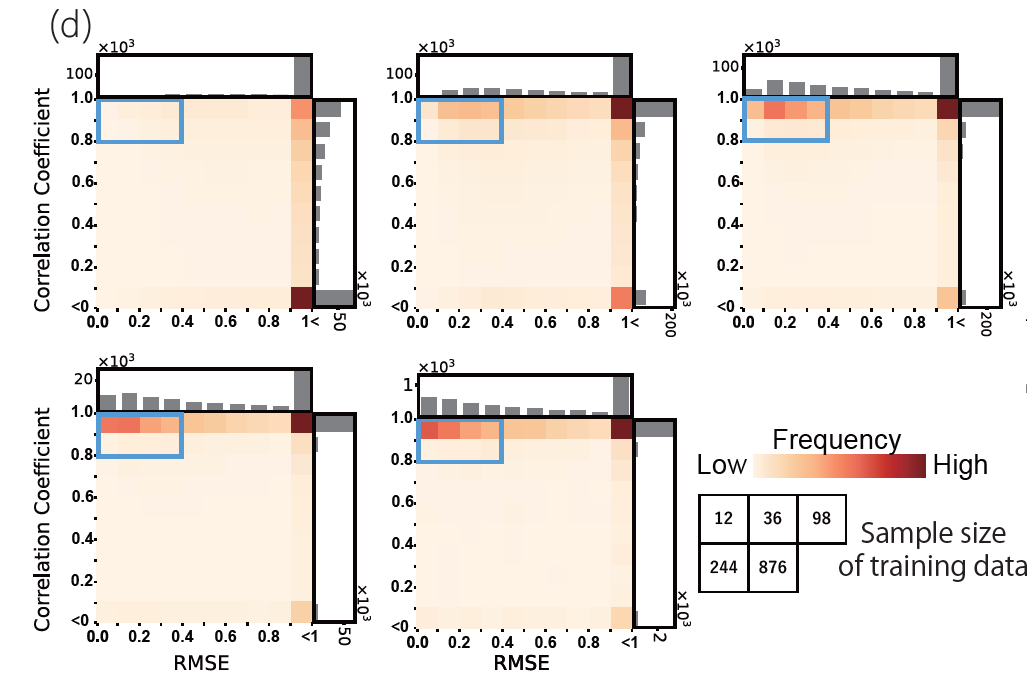

In [ ]:
df_TimeStep_Path =  r"df_Pridiciton_Success_Day.csv"
df = dd.read_csv(df_TimeStep_Path,assume_missing=True).compute()
df = ExtractEnvCount_FromALTC(df)
df = df[['Corr', 'RMSE','EnvCount']]

# Rounding Corr and RMSE to one decimal place & rounding RMSE 2.5 or higher
df = df.astype({"Corr": float, "RMSE": float})
df['RMSE'] = df['RMSE'].apply(lambda x: 3 if x > 3.0 else x)
df = df.dropna(how='any')

In [ ]:
def categorize_corr(corr_value):
    
    if corr_value >= 0.9:
        return 0.9
    
    elif 0.9 > corr_value >= 0.8:
        return 0.8
    
    elif 0.8 > corr_value >= 0.7:
        return 0.7
    
    elif 0.7 > corr_value >= 0.6:
        return 0.6
    
    elif 0.6 > corr_value >= 0.5:
        return 0.5
    
    elif 0.5 > corr_value >= 0.4:
        return 0.4
    
    elif 0.4 > corr_value >= 0.3:
        return 0.3

    elif 0.3 > corr_value >= 0.2:
        return 0.2

    elif 0.2 > corr_value >= 0.1:
        return 0.1
    
    elif 0.1 > corr_value:
        return 0

def categorize_rmse(rmse_value):
    
    if rmse_value >= 0.9:
        return 0.9
    
    elif 0.9 > rmse_value >= 0.8:
        return 0.8
    
    elif 0.8 > rmse_value >= 0.7:
        return 0.7
    
    elif 0.7 > rmse_value >= 0.6:
        return 0.6
    
    elif 0.6 > rmse_value >= 0.5:
        return 0.5
    
    elif 0.5 > rmse_value >= 0.4:
        return 0.4
    
    elif 0.4 > rmse_value >= 0.3:
        return 0.3

    elif 0.3 > rmse_value >= 0.2:
        return 0.2

    elif 0.2 > rmse_value >= 0.1:
        return 0.1
    
    elif 0.1 > rmse_value:
        return 0

df['CorrCategory'] = df['Corr'].apply(categorize_corr)
df['RMSECategory'] = df['RMSE'].apply(categorize_rmse)

In [ ]:
def Making_CorrRMSE_Frequency_Categorized(DATAFRAME , ENVCOUNT , SAVEFOLDER):
    
    DATAFRAME = DATAFRAME[DATAFRAME["EnvCount"] == ENVCOUNT]
    Matrix_DataFrame = DATAFRAME.pivot_table(index=['CorrCategory'], columns=['RMSECategory'], aggfunc='size',fill_value=0)
    
    Count_2Dlist = Matrix_DataFrame.values.tolist()

    Index_List = Matrix_DataFrame.index.tolist()
    Index_List = [str(i) for i in Index_List]
    
    Column_List = Matrix_DataFrame.columns.tolist()
    Column_List = [str(i) for i in Column_List]
    
    HeatMap_df = pd.DataFrame(data = Count_2Dlist, index = Index_List, columns = Column_List)
    NewIndex_List = ["0.9", "0.8", "0.7", "0.6", "0.5" , "0.4", "0.3", "0.2", "0.1" , "0.0"]
    HeatMap_df = HeatMap_df.reindex(NewIndex_List)
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax= sns.heatmap(HeatMap_df ,cmap="OrRd", annot=False , fmt=".0f", cbar=False)
    
    ax.set_xlabel("RMSE", fontsize = 10)
    ax.set_ylabel("Correlation Coefficient", fontsize = 10)
    
    plt.tick_params(labelsize = 12.5)
    
    Fig_Title = "Corr and RMSE Frequency in EnvCount " + str(ENVCOUNT)
    #plt.title(Fig_Title, fontsize=13)
    
    SaveFileName = SAVEFOLDER + "CorrandRMSEFrequencyinEnvCount" + "Categorized" +  str(ENVCOUNT) + "_Heatmap.svg"
    
    plt.savefig(SaveFileName,dpi=1000)
    plt.show()
    plt.close()
    plt.clf()
    
    return None

def Plot_RMSE_HistGram(DF_CATEGORIZED , ENVCOUNT , SAVEFOLDER):
    
    df_Categorized_EnvCount = DF_CATEGORIZED
    df_Categorized_EnvCount = df_Categorized_EnvCount[df_Categorized_EnvCount["EnvCount"] == ENVCOUNT]
    
    fig = plt.figure(figsize=(5,1))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))  
    ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))  
    
    ax.hist([df_Categorized_EnvCount["RMSECategory"]], color = "grey",rwidth=0.8)
    ax.set_xticks([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    ax.set_xticklabels([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    
    plt.tick_params(labelsize=13)
    
    SaveFileName = SAVEFOLDER + "RMSEFrequencyinEnvCount" + "Categorized" +  str(ENVCOUNT) + "_Histgram.svg"
    plt.savefig(SaveFileName,dpi=1000)
    
    return None

def Plot_Corr_HistGram(DF_CATEGORIZED , ENVCOUNT , SAVEFOLDER):
    
    df_Categorized_EnvCount = DF_CATEGORIZED
    df_Categorized_EnvCount = df_Categorized_EnvCount[df_Categorized_EnvCount["EnvCount"] == ENVCOUNT]
    
    fig = plt.figure(figsize=(5,1))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))  
    ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   
    
    ax.hist([df_Categorized_EnvCount["CorrCategory"]], color = "grey",rwidth=0.8)
    ax.set_xticks([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    ax.set_xticklabels([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    
    plt.tick_params(labelsize=13)
    
    SaveFileName = SAVEFOLDER + "CorrFrequencyinEnvCount" + "Categorized" +  str(ENVCOUNT) + "_Histgram.svg"
    plt.savefig(SaveFileName,dpi=1000)
    plt.show()
    plt.close()
    plt.clf()

    return None

In [ ]:
# Each Sample size's data count
print("Sample Size 12 : " , len(df[df["EnvCount"] == "1"]))
print("Sample Size 36 : " , len(df[df["EnvCount"] == "3"]))
print("Sample Size 98 : " , len(df[df["EnvCount"] == "08"]))


print("Sample Size 08Day : " , len(df[df["EnvCount"] == "08Day"]))
print("Sample Size 08Night : " , len(df[df["EnvCount"] == "08Night"]))

In [ ]:
Making_CorrRMSE_Frequency_Categorized(df , "1", r"Fig\\")
Making_CorrRMSE_Frequency_Categorized(df , "3" , r"Fig\\")
Making_CorrRMSE_Frequency_Categorized(df , "08", r"Fig\\")
Making_CorrRMSE_Frequency_Categorized(df , "24" , r"Fig\\")
Making_CorrRMSE_Frequency_Categorized(df , "73" , r"Fig\\")

In [ ]:
Plot_Corr_HistGram(df ,"1" , r"Fig\\")
Plot_Corr_HistGram(df ,"3", r"Fig\\")
Plot_Corr_HistGram(df ,"08", r"Fig\\")
Plot_Corr_HistGram(df ,"24", r"Fig\\")
Plot_Corr_HistGram(df ,"73", r"Fig\\")

In [ ]:
Plot_RMSE_HistGram(df ,"1", r"Fig\\")
Plot_RMSE_HistGram(df ,"3", r"Fig\\")
Plot_RMSE_HistGram(df ,"08", r"Fig\\")
Plot_RMSE_HistGram(df ,"24", r"Fig\\")
Plot_RMSE_HistGram(df ,"73", r"Fig\\")

# Fig3f : Frequency of correlation coefficients and RMSEs in all days

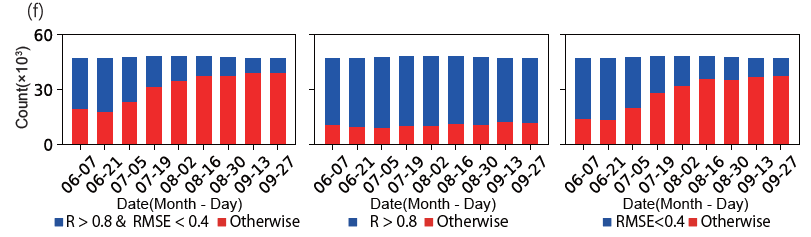

In [ ]:
df_TimeStep_Path =  r"df_Pridiciton_Success_Day.csv"
df = dd.read_csv(df_TimeStep_Path , assume_missing=True, dtype = 'object').compute()
df = ExtractEnvCount_FromALTC(df)

# Exclude the corr which can not def
df = df.dropna(how='any')

df = df[['Date(NoHour)','Corr_Success','RMSE_Success', 'Pridiciton_Success', 'EnvCount']]

In [ ]:
#/**
# * @Parameter DATAFRAME(data.frame) Filtered by EnvCount , FILTERING_COLUMN(str)
# * Count the number of genes successfully and unsuccessfully predicted for each date, based on FILTERING_COLUMN(Corr,RMSE), and return df
# * @return data.frame
# */

def Make_SuccessFail_Countdf(DATAFRAME , FILTERING_COLUMN):
    
    df_gb = DATAFRAME.groupby(['Date(NoHour)',FILTERING_COLUMN], as_index=False).count()
    df_gb = df_gb[['Date(NoHour)', FILTERING_COLUMN ,'EnvCount']]
    df_gb = df_gb.rename(columns={'EnvCount': "Count"})

    df_gb = pd.pivot_table(df_gb, values='Count', index='Date(NoHour)', columns = FILTERING_COLUMN , fill_value=0)
    df_gb.reset_index()
    
    return df_gb 

In [ ]:
df_01 = df[df["EnvCount"] == "1"]
df_03 = df[df["EnvCount"] == "3"]

df_08 = df[df["EnvCount"] == "08"]
df_08Day = df[df["EnvCount"] == "08Day"]
df_08Night = df[df["EnvCount"] == "08Night"]

df_24 = df[df["EnvCount"] == "24"]

df_73 = df[df["EnvCount"] == "73"]

In [ ]:
df_01_gb_Corr = Make_SuccessFail_Countdf(df_01 , 'Corr_Success')
df_01_gb_RMSE = Make_SuccessFail_Countdf(df_01 , 'RMSE_Success')
df_01_gb_All = Make_SuccessFail_Countdf(df_01 , 'Pridiciton_Success')

df_03_gb_Corr = Make_SuccessFail_Countdf(df_03 , 'Corr_Success')
df_03_gb_RMSE = Make_SuccessFail_Countdf(df_03 , 'RMSE_Success')
df_03_gb_All = Make_SuccessFail_Countdf(df_03 , 'Pridiciton_Success')

df_08_gb_Corr = Make_SuccessFail_Countdf(df_08 , 'Corr_Success')
df_08_gb_RMSE = Make_SuccessFail_Countdf(df_08 , 'RMSE_Success')
df_08_gb_All = Make_SuccessFail_Countdf(df_08 , 'Pridiciton_Success')

df_08Day_gb_Corr = Make_SuccessFail_Countdf(df_08Day , 'Corr_Success')
df_08Day_gb_RMSE = Make_SuccessFail_Countdf(df_08Day , 'RMSE_Success')
df_08Day_gb_All = Make_SuccessFail_Countdf(df_08Day , 'Pridiciton_Success')

df_08Night_gb_Corr = Make_SuccessFail_Countdf(df_08Night , 'Corr_Success')
df_08Night_gb_RMSE = Make_SuccessFail_Countdf(df_08Night , 'RMSE_Success')
df_08Night_gb_All = Make_SuccessFail_Countdf(df_08Night , 'Pridiciton_Success')

df_24_gb_Corr = Make_SuccessFail_Countdf(df_24 , 'Corr_Success')
df_24_gb_RMSE = Make_SuccessFail_Countdf(df_24 , 'RMSE_Success')
df_24_gb_All = Make_SuccessFail_Countdf(df_24 , 'Pridiciton_Success')

df_73_gb_Corr = Make_SuccessFail_Countdf(df_73 , 'Corr_Success')
df_73_gb_RMSE = Make_SuccessFail_Countdf(df_73 , 'RMSE_Success')
df_73_gb_All = Make_SuccessFail_Countdf(df_73 , 'Pridiciton_Success')

In [ ]:
print("SampleSize12 Acc" , len(df_01[df_01["Pridiciton_Success"] == "1"]) , len(df_01) , (len(df_01[df_01["Pridiciton_Success"] == "1"]) / len(df_01)))
print("SampleSize36 Acc" , len(df_03[df_03["Pridiciton_Success"] == "1"]) , len(df_03) , (len(df_03[df_03["Pridiciton_Success"] == "1"]) / len(df_03)))
print("SampleSize96 Acc" , len(df_08[df_08["Pridiciton_Success"] == "1"]) , len(df_08) , (len(df_08[df_08["Pridiciton_Success"] == "1"]) / len(df_08)))
print("SampleSize288 Acc" , len(df_24[df_24["Pridiciton_Success"] == "1"]) , len(df_24) , (len(df_24[df_24["Pridiciton_Success"] == "1"]) / len(df_24)))

In [ ]:
def MakeFigure_SuccessFail(DATAFRAME , Xlabel1 , xLabel2 , xLabel3 , SAVEFOLDER , ENVCOUNT , DATATYPE):
    
    df = DATAFRAME.reset_index()
    df = df[['Date(NoHour)', '0', '1']]
    df['Date(NoHour)'] = df['Date(NoHour)'].str[5:]
    
    fig = plt.figure(figsize=(3.3,1.5))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   
    ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   
    
    hist = ax.bar(df["Date(NoHour)"] , df["0"], color="red", label="red" , width = 0.6)
    hist = ax.bar(df["Date(NoHour)"] , df["1"], bottom = df["0"], color="blue", label="blue" , width = 0.6)
    

    
    ax.tick_params(labelsize=12)
    plt.xticks(rotation=45)

    ax.set_yticks([Xlabel1 , xLabel2 , xLabel3])
    ax.set_ylim(Xlabel1, xLabel3)
    
    SaveFileName = SAVEFOLDER + ENVCOUNT+ "_"  + DATATYPE + "_successes and failures by day.svg"
    plt.savefig(SaveFileName,dpi=1000)
    #plt.clf()
    #plt.close()

    
    return None

In [ ]:
MakeFigure_SuccessFail(df_08_gb_All , 0 , 30000 , 60000 , r"Fig\\" , "96" , "Corr_RMSE")
MakeFigure_SuccessFail(df_08_gb_Corr , 0 , 30000 , 60000 , r"Fig\\" , "96" , "Corr")
MakeFigure_SuccessFail(df_08_gb_RMSE , 0 , 30000 , 60000 , r"Fig\\" , "96" , "RMSE")

# Fig4a : Number of genes successfully/failed to predict per date for each sample size simulation sampling condition.

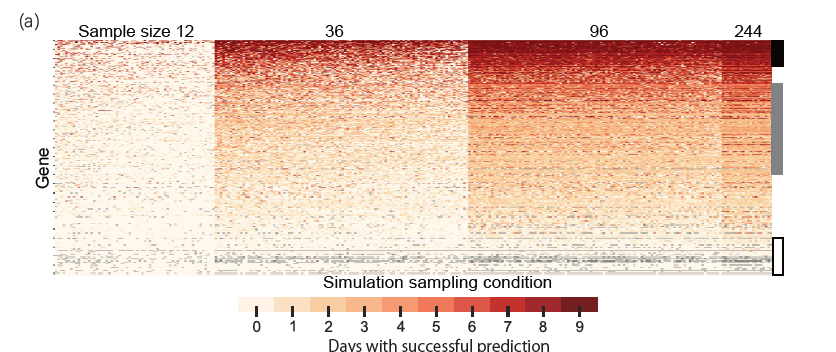

In [ ]:
df_TimeStep_Path =  r"df_Pridiciton_Success_Day.csv"
df = dd.read_csv(df_TimeStep_Path , assume_missing=True, dtype = 'object').compute()
df = ExtractEnvCount_FromALTC(df)
#df = df[['ALTC', 'Gene','Date(NoHour)','Pridiciton_Success', 'EnvCount']]

In [ ]:
df_NullCorr = df[(df['Corr'].isnull())]
df_NullCorr = df_NullCorr[df_NullCorr["RMSE_Success"] == "1"]
df_NullCorr = df_NullCorr[["ALTC" , "Gene"]]
df_NullCorr = df_NullCorr.drop_duplicates()
df_NullCorr["DupliFlag"] = 1

In [ ]:
def Making_HighAccuracyRanking_dataframe(DATAFRAME):
    
    df_01 = DATAFRAME[DATAFRAME["EnvCount"] == "1"]
    
    df_03 = DATAFRAME[DATAFRAME["EnvCount"] == "3"]

    df_08 = DATAFRAME[DATAFRAME["EnvCount"] == "08"]

    df_24 = DATAFRAME[DATAFRAME["EnvCount"] == "24"]

    df_73 = DATAFRAME[DATAFRAME["EnvCount"] == "73"]
    
    df_01_gb = df_01.groupby(['ALTC', 'Gene',"Pridiciton_Success"], as_index=False).size()
    df_03_gb = df_03.groupby(['ALTC', 'Gene',"Pridiciton_Success"], as_index=False).size()
    df_08_gb = df_08.groupby(['ALTC', 'Gene',"Pridiciton_Success"], as_index=False).size()
    df_24_gb = df_24.groupby(['ALTC', 'Gene',"Pridiciton_Success"], as_index=False).size()
    df_73_gb = df_73.groupby(['ALTC', 'Gene',"Pridiciton_Success"], as_index=False).size()


    # Number of days of predicted success for each gene
    df_01_gb_SuccessMore1Day = df_01_gb[ (df_01_gb["Pridiciton_Success"] == "1")]
    df_01_gb_Success0Day = df_01_gb[ (df_01_gb["Pridiciton_Success"] == "0") & (df_01_gb["size"] == 9)]
    df_01_gb_Success0Day["size"] = 0
    df_01_gb_Gene = pd.concat([df_01_gb_SuccessMore1Day , df_01_gb_Success0Day])
    df_01_gb_Gene = df_01_gb_Gene[["ALTC" , "Gene" , "size"]]
    
    df_03_gb_SuccessMore1Day = df_03_gb[ (df_03_gb["Pridiciton_Success"] == "1")]
    df_03_gb_Success0Day = df_03_gb[ (df_03_gb["Pridiciton_Success"] == "0") & (df_03_gb["size"] == 9)]
    df_03_gb_Success0Day["size"] = 0
    df_03_gb_Gene = pd.concat([df_03_gb_SuccessMore1Day , df_03_gb_Success0Day])
    df_03_gb_Gene = df_03_gb_Gene[["ALTC" , "Gene" , "size"]]

    df_08_gb_SuccessMore1Day = df_08_gb[ (df_08_gb["Pridiciton_Success"] == "1")]
    df_08_gb_Success0Day = df_08_gb[ (df_08_gb["Pridiciton_Success"] == "0") & (df_08_gb["size"] == 9)]
    df_08_gb_Success0Day["size"] = 0
    df_08_gb_Gene = pd.concat([df_08_gb_SuccessMore1Day , df_08_gb_Success0Day])
    df_08_gb_Gene = df_08_gb_Gene[["ALTC" , "Gene" , "size"]]

    df_24_gb_SuccessMore1Day = df_24_gb[ (df_24_gb["Pridiciton_Success"] == "1")]
    df_24_gb_Success0Day = df_24_gb[ (df_24_gb["Pridiciton_Success"] == "0") & (df_24_gb["size"] == 9)]
    df_24_gb_Success0Day["size"] = 0
    df_24_gb_Gene = pd.concat([df_24_gb_SuccessMore1Day , df_24_gb_Success0Day])
    df_24_gb_Gene = df_24_gb_Gene[["ALTC" , "Gene" , "size"]]
    
    df_73_gb_SuccessMore1Day = df_73_gb[ (df_73_gb["Pridiciton_Success"] == "1")]
    df_73_gb_Success0Day = df_73_gb[ (df_73_gb["Pridiciton_Success"] == "0") & (df_73_gb["size"] == 9)]
    df_73_gb_Success0Day["size"] = 0
    df_73_gb_Gene = pd.concat([df_73_gb_SuccessMore1Day , df_73_gb_Success0Day])
    df_73_gb_Gene = df_73_gb_Gene[["ALTC" , "Gene" , "size"]]


    # Prediction accuracy per ALTC
    df_01_ALTC = df_01_gb_Gene.groupby(['ALTC'], as_index=False).agg({'size': 'mean'})
    df_01_ALTC["EnvCount"] = "1"

    df_03_ALTC = df_03_gb_Gene.groupby(['ALTC'], as_index=False).agg({'size': 'mean'})
    df_03_ALTC["EnvCount"] = "3"
    
    df_08_ALTC = df_08_gb_Gene.groupby(['ALTC'], as_index=False).agg({'size': 'mean'})
    df_08_ALTC["EnvCount"] = "08"

    df_24_ALTC = df_24_gb_Gene.groupby(['ALTC'], as_index=False).agg({'size': 'mean'})
    df_24_ALTC["EnvCount"] = "24" 

    df_73_ALTC = df_73_gb_Gene.groupby(['ALTC'], as_index=False).agg({'size': 'mean'})
    df_73_ALTC["EnvCount"] = "73"  

    df_all_Gene = pd.concat([df_01_gb_Gene , df_03_gb_Gene , df_08_gb_Gene , df_24_gb_Gene , df_73_gb_Gene])
    df_all_Gene = df_all_Gene.groupby(['Gene'], as_index=False).agg({'size': 'mean'})
    df_all_Gene = df_all_Gene.sort_values('size', ascending=False)
    df_all_Gene["Gene_Ranking"] = list(range(500))
    #df_all_Gene = df_all_Gene[["Gene","Gene_Ranking"]]


    df_all_ALTC = pd.concat([df_01_ALTC , df_03_ALTC , df_08_ALTC , df_24_ALTC , df_73_ALTC])
    df_all_ALTC = df_all_ALTC.rename(columns={'size': 'ATLC_Ranking'})
    df_all_ALTC = df_all_ALTC.sort_values('ATLC_Ranking', ascending=False)
    
    
    return df_all_Gene , df_all_ALTC

def Make_Heatmap_DataFrame_InGeneOrder(DATAFRAME , ENVCOUNT , DATAFRAME_NULL_CORR , DATAFRAME_GENEORDER , DATAFRAME_ALTCORDER):
    
    df_EnvCount = DATAFRAME[DATAFRAME["EnvCount"] == ENVCOUNT]
    df_EnvCount_gb  = df_EnvCount.groupby(['ALTC', 'Gene',"Pridiciton_Success"], as_index=False).size()
    
    df_EnvCount_SuccessMore1Day = df_EnvCount_gb[ (df_EnvCount_gb["Pridiciton_Success"] == "1")]
    df_EnvCount_gb_Success0Day = df_EnvCount_gb[ (df_EnvCount_gb["Pridiciton_Success"] == "0") & (df_EnvCount_gb["size"] == 9)]
    df_EnvCount_gb_Success0Day["size"] = 0
    df_EnvCount_gb = pd.concat([df_EnvCount_SuccessMore1Day , df_EnvCount_gb_Success0Day])
    
    df_EnvCount_gb = pd.merge(df_EnvCount_gb , DATAFRAME_NULL_CORR , on = ["ALTC" , "Gene"] , how = "left")
    df_EnvCount_gb['size'] = df_EnvCount_gb.apply(lambda row: -1 if row['DupliFlag'] == 1 else row['size'], axis=1)
    df_EnvCount_gb = df_EnvCount_gb.drop('DupliFlag', axis=1)
    
    df_all_ALTC_EnvCount = DATAFRAME_ALTCORDER[DATAFRAME_ALTCORDER["EnvCount"] == ENVCOUNT]
    df_all_ALTC_EnvCount = df_all_ALTC_EnvCount.sort_values('ATLC_Ranking', ascending=False)
    
    df_EnvCount_gb['Gene'] = pd.Categorical(df_EnvCount_gb['Gene'], categories = list(DATAFRAME_GENEORDER["Gene"]), ordered=True)
    df_EnvCount_gb['ALTC'] = pd.Categorical(df_EnvCount_gb['ALTC'], categories = list(df_all_ALTC_EnvCount["ALTC"]), ordered=True)
    df_EnvCount_gb = df_EnvCount_gb.sort_values(['Gene', 'ALTC'])
    
    Matrix_DataFrame = pd.pivot_table(df_EnvCount_gb, values='size', index='Gene', columns='ALTC', aggfunc='sum')

    
    return Matrix_DataFrame

In [ ]:
df_all_Gene , df_all_ALTC = Making_HighAccuracyRanking_dataframe(df)

Matrix_DataFrame_01 = Make_Heatmap_DataFrame_InGeneOrder(df , "1" , df_NullCorr ,df_all_Gene , df_all_ALTC)
Matrix_DataFrame_03 = Make_Heatmap_DataFrame_InGeneOrder(df , "3" , df_NullCorr , df_all_Gene , df_all_ALTC)
Matrix_DataFrame_08 = Make_Heatmap_DataFrame_InGeneOrder(df , "08" , df_NullCorr,df_all_Gene , df_all_ALTC)
Matrix_DataFrame_24 = Make_Heatmap_DataFrame_InGeneOrder(df , "24" , df_NullCorr,df_all_Gene , df_all_ALTC)

result = pd.concat([Matrix_DataFrame_01 , Matrix_DataFrame_03 , Matrix_DataFrame_08 , Matrix_DataFrame_24], axis=1)

In [ ]:
df_Prd_Suc_Gene = df[df["EnvCount"] == "08"]
df_Prd_Suc_Gene = df.groupby(['ALTC', 'Gene',"Pridiciton_Success"], as_index=False).size()

df_Prd_Suc_Gene_1= df_Prd_Suc_Gene[ (df_Prd_Suc_Gene["Pridiciton_Success"] == "1")]
df_Prd_Suc_Gene_2 = df_Prd_Suc_Gene[ (df_Prd_Suc_Gene["Pridiciton_Success"] == "0") & (df_Prd_Suc_Gene["size"] == 9)]
df_Prd_Suc_Gene_2["size"] = 0

df_Prd_Suc_Gene = pd.concat([df_Prd_Suc_Gene_1 , df_Prd_Suc_Gene_2])
df_Prd_Suc_Gene = df_Prd_Suc_Gene.groupby(['Gene'], as_index=False).mean(numeric_only=True)
df_Prd_Suc_Gene = pd.merge(df_all_Gene , df_Prd_Suc_Gene , on = "Gene")

In [ ]:
fig, ax = plt.subplots(figsize=(7, 1.5))
ax.plot(df_all_Gene["Gene_Ranking"], df_all_Gene["size"])

ax.set_yticks([0 , 3 ,6, 9])
ax.set_ylim(0, 9)

ax.tick_params(axis='y', labelsize=18)
plt.savefig(r"Fig//Prd_SucDay_All_Gene.svg" , dpi = 2000)

In [ ]:
mask = result == -1

fig, ax = plt.subplots(figsize=(15,5))

cmap = mpl.colormaps.get_cmap('OrRd')
cmap.set_bad("grey")

sns.heatmap(result,mask = mask,cmap=cmap)
plt.savefig(r"Fig\\AllALTCheatmap.jpg" , dpi=2000)

# Fig4b : Prediction accuracy per gene for each sampling condition.

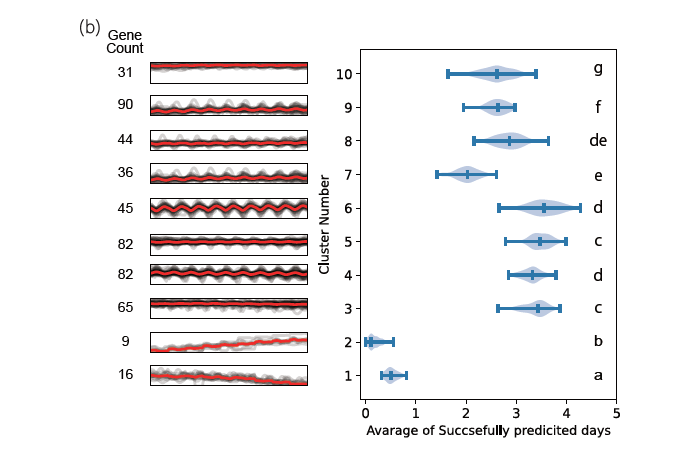

In [ ]:
df_path = r"df_all_fit_filterd.csv"
df_alldata = dd.read_csv(df_path , assume_missing = True , dtype={'EnvCount': 'object' , 'Time' : int , 'FIT_Test_Value' : float ,'FIT_Reference_Value' : float}).compute()
df_alldata = df_alldata[(df_alldata["EnvCount"] == "08") & (df_alldata["ALTC"] == "ALTC_08_001")]
df_alldata = df_alldata[["Time" , "Date" , "Gene" , "FIT_Reference_Value"]]

In [ ]:
df_Matrix = df_alldata.pivot_table(values=['FIT_Reference_Value'], index=['Gene'], columns=['Date'], aggfunc='sum')

In [ ]:
Count_2Dlist = df_Matrix.values.tolist()

Index_List = df_Matrix.index.tolist()
Index_List = [str(i) for i in Index_List]

Column_List = df_Matrix.columns.tolist()
Column_List = [str(i) for i in Column_List]

HeatMap_df = pd.DataFrame(data = Count_2Dlist, index = Index_List, columns = Column_List)

In [ ]:
Time_np = to_time_series_dataset(HeatMap_df)

In [ ]:
n = 10
km_euclidean = TimeSeriesKMeans(n_clusters=n, metric='euclidean', random_state=0)
labels_euclidean = km_euclidean.fit_predict(Time_np)

In [ ]:
fig, axes = plt.subplots(n, figsize=(2,6))
plt.subplots_adjust(hspace=1.5)


for i in range(n):
    ax = axes[i]
    
    ax.set_yticks([0 , 5 , 10 , 15 , 20])
    ax.set_ylim(4, 16)
    ax.tick_params(axis='y', labelsize=9)

    ax.set_xticks([0, 12, 24, 36, 48, 60,72,84,96,108])
    ax.set_xlim(-1, 108)
    ax.tick_params(axis='x', labelsize=9 , rotation=60)

    for x in Time_np[labels_euclidean == i]:
        ax.plot(x.ravel(), 'k-', alpha=0.1)
    
    ax.plot(km_euclidean.cluster_centers_[i].ravel(), 'r-')

    datanum = np.count_nonzero(labels_euclidean == i)
    
    ax.text(0, 16.5, f'Cluster{(i)} : n = {datanum}', fontsize=8.5)

plt.savefig(r"Fig//GeneClustering.svg" , dpi = 2000)
plt.show()

In [ ]:
df = dd.read_csv(r"df_Pridiciton_Success_Day.csv" , assume_missing=True, dtype = 'object').compute()
df = ExtractEnvCount_FromALTC(df)
df = df[['ALTC', 'Gene','Date(NoHour)','Pridiciton_Success', 'EnvCount']]

df_Gene_Cluster = pd.read_csv("df_Gene_Cluster.csv")

In [ ]:
def Making_HighAccuracyRanking_dataframe(DATAFRAME):

    df_08 = DATAFRAME[DATAFRAME["EnvCount"] == "08"]
    df_08_gb = df_08.groupby(['ALTC', 'Gene',"Pridiciton_Success"], as_index=False).size()

    df_08_gb_SuccessMore1Day = df_08_gb[ (df_08_gb["Pridiciton_Success"] == "1")]
    df_08_gb_Success0Day = df_08_gb[ (df_08_gb["Pridiciton_Success"] == "0") & (df_08_gb["size"] == 9)]
    df_08_gb_Success0Day["size"] = 0
    df_08_gb_Gene = pd.concat([df_08_gb_SuccessMore1Day , df_08_gb_Success0Day])
    df_08_gb_Gene = df_08_gb_Gene[["ALTC" , "Gene" , "size"]]

    df_08_ALTC = df_08_gb_Gene.groupby(['ALTC'], as_index=False).agg({'size': 'mean'})
    df_08_ALTC["EnvCount"] = "08"

    df_all_Gene = df_08_gb_Gene.groupby(['Gene'], as_index=False).agg({'size': 'mean'})
    df_all_Gene = df_all_Gene.sort_values('size', ascending=False)
    df_all_Gene["Gene_Ranking"] = list(range(500))
    df_all_Gene = df_all_Gene[["Gene","Gene_Ranking"]]

    df_all_ALTC = df_08_ALTC.rename(columns={'size': 'ATLC_Ranking'})
    df_all_ALTC = df_all_ALTC.sort_values('ATLC_Ranking', ascending=False)
    
    return df_all_Gene , df_all_ALTC

In [ ]:
df_EnvCount = df[df["EnvCount"] == "08"]
df_EnvCount_gb  = df_EnvCount.groupby(['ALTC', 'Gene',"Pridiciton_Success"], as_index=False).size()
df_EnvCount_SuccessMore1Day = df_EnvCount_gb[ (df_EnvCount_gb["Pridiciton_Success"] == "1")]
df_EnvCount_gb_Success0Day = df_EnvCount_gb[ (df_EnvCount_gb["Pridiciton_Success"] == "0") & (df_EnvCount_gb["size"] == 9)]
df_EnvCount_gb_Success0Day["Pridiciton_Success"] = 1
df_EnvCount_gb_Success0Day["size"] = 0
df_EnvCount_gb = pd.concat([df_EnvCount_SuccessMore1Day , df_EnvCount_gb_Success0Day])

df_EnvCount_gb = pd.merge(df_EnvCount_gb ,  df_Gene_Cluster, on = "Gene" , how = "inner")
df_EnvCount_gb = df_EnvCount_gb[["ALTC" , "ClusterNum" , "size"]]
df_EnvCount_gb = df_EnvCount_gb.groupby(['ALTC', 'ClusterNum'], as_index=False).sum()

ClusterNum_Counter = collections.Counter(df_Gene_Cluster["ClusterNum"])
df_EnvCount_gb['size'] = df_EnvCount_gb.apply(lambda row: row['size'] / ClusterNum_Counter[row['ClusterNum']], axis=1)

In [ ]:
Num_List = []

for Cluster_Num in ([ 1 ,2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10]):
    
    df_filter = df_EnvCount_gb[df_EnvCount_gb["ClusterNum"] == Cluster_Num]
    
    Num_List.append(list(df_filter["size"]))

In [ ]:
fig, ax = plt.subplots(figsize=(4,5.5))

ax.violinplot(Num_List, showmedians=True , vert = False)


plt.xlabel("Avarage of Succsefully predicited days" , fontsize=11)
plt.ylabel("Cluster Number", fontsize=11)

#ax.set_yticklabels()

ax.set_yticks([1, 2, 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10])
labels = ["1" , "2" , "3" , "4" , "5" , "6" , "7" , "8" , "9" , "10"]

ax.set_xlim(-0.1, 5)

ax.set_yticklabels(labels)

plt.tick_params(labelsize=11.5)

plt.savefig(r"Fig\\Prediction accuracy per gene cluster.svg", dpi=2000)
plt.show()

# Fig5 b , c Prediction accuracy for diurnal sampling and light/dark only sampling.

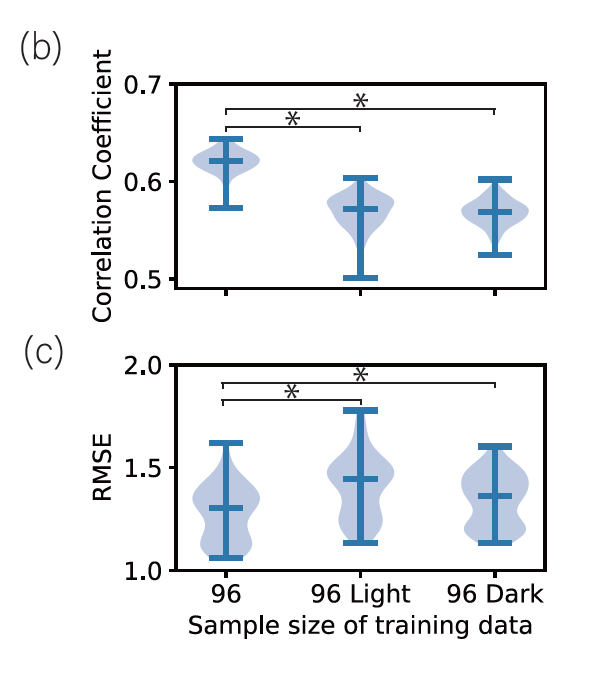

In [ ]:
df_CorrRMSE_Path = r"df_CorrRMSE.csv"

df = dd.read_csv(df_CorrRMSE_Path,assume_missing=True).compute()

df = ExtractEnvCount_FromALTC(df)

In [ ]:
df_gb_CorrMean = df.groupby(["ALTC",'EnvCount'], as_index=False).agg({"Corr" : 'mean' , "RMSE" : "mean"})

In [ ]:
Corr_PlotList = []
RMSE_PlotList = []

for EnvCount in (["1","3","08","08Day","08Night","24","73"]):
    
    df_filter = df_gb_CorrMean[df_gb_CorrMean["EnvCount"] == EnvCount]
    
    Corr_PlotList.append(list(df_filter["Corr"]))
    RMSE_PlotList.append(list(df_filter["RMSE"]))

In [ ]:
Corr_PlotList_SampleSize = [(Corr_PlotList[2]) , (Corr_PlotList[3]) , (Corr_PlotList[4])]

fig, ax = plt.subplots(figsize=(3.5, 2))
ax.violinplot(Corr_PlotList_SampleSize, showmedians=True)

plt.ylabel("Correlation Coefficient", fontsize=13)
ax.set_ylim(0.49, 0.7)
ax.set_yticks([0.5 , 0.6 , 0.7])

plt.xlabel("Sample size of training data", fontsize=13)
ax.set_xticks([1, 2, 3])
labels = ["96","96 Light","96 Dark"]
ax.set_xticklabels(labels)

plt.tick_params(labelsize=13)

In [ ]:
SampleSize_96to96Lihgt_Corr_Utest = stats.mannwhitneyu((Corr_PlotList[2]), (Corr_PlotList[3]), alternative='two-sided')
SampleSize_96to96Dark_Corr_Utest = stats.mannwhitneyu((Corr_PlotList[2]), (Corr_PlotList[4]), alternative='two-sided')

In [ ]:
print("Mann-Whitney U test with sample sizes of 96 and 96Light")
print(SampleSize_96to96Lihgt_Corr_Utest)

print("Mann-Whitney U test with sample sizes of 96 and 96Dark")
print(SampleSize_96to96Dark_Corr_Utest)

In [ ]:
RMSE_PlotList_SampleSize = [(RMSE_PlotList[2]) , (RMSE_PlotList[3]) , (RMSE_PlotList[4])]

fig, ax = plt.subplots(figsize=(3.5, 2))
ax.violinplot(RMSE_PlotList_SampleSize, showmedians=True)

plt.xlabel("Sample size of training data", fontsize=13)
ax.set_xticks([1, 2, 3])
labels = ["96","96 Light","96 Dark"]
ax.set_xticklabels(labels)

plt.ylabel("RMSE", fontsize = 13)
ax.set_ylim(1, 2)
ax.set_yticks([1 , 1.5 , 2])
plt.tick_params(labelsize=13)

In [ ]:
SampleSize_96to96Dark_RMSE_Utest = stats.mannwhitneyu((RMSE_PlotList[2]), (RMSE_PlotList[3]), alternative='two-sided')
SampleSize_96to96Dark_RMSE_Utest = stats.mannwhitneyu((RMSE_PlotList[2]), (RMSE_PlotList[4]), alternative='two-sided')

In [ ]:
print("Mann-Whitney U test with sample sizes of 96 and 96Light")
print(SampleSize_96to96Dark_RMSE_Utest)

print("Mann-Whitney U test with sample sizes of 96 and 96Dark")
print(SampleSize_96to96Dark_RMSE_Utest)

# Fig5d Frequency of correlation coefficients and RMSEs in all days

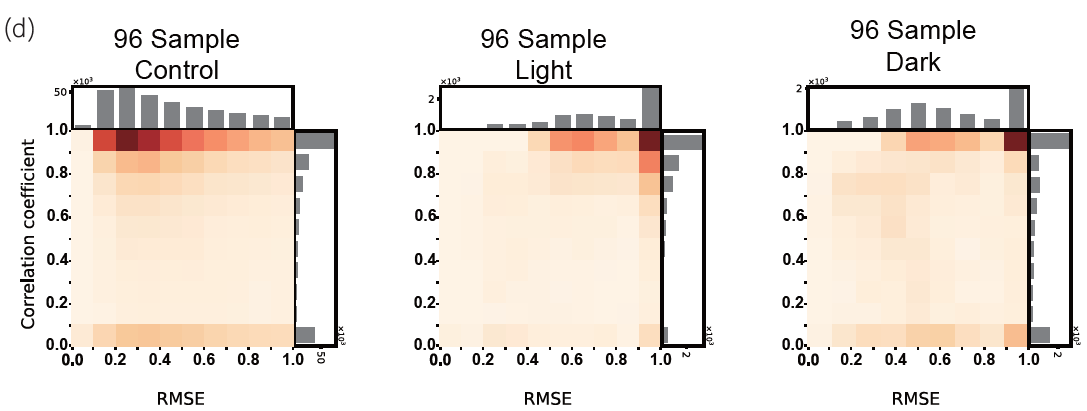

In [ ]:
df_TimeStep_Path =  r"df_Pridiciton_Success_Day.csv"
df = dd.read_csv(df_TimeStep_Path,assume_missing=True).compute()
df = ExtractEnvCount_FromALTC(df)
df = df[['Corr', 'RMSE','EnvCount']]

# Rounding Corr and RMSE to one decimal place & rounding RMSE 2.5 or higher
df = df.astype({"Corr": float, "RMSE": float})
df['RMSE'] = df['RMSE'].apply(lambda x: 3 if x > 3.0 else x)
df = df.dropna(how='any')

In [ ]:
def categorize_corr(corr_value):
    
    if corr_value >= 0.9:
        return 0.9
    
    elif 0.9 > corr_value >= 0.8:
        return 0.8
    
    elif 0.8 > corr_value >= 0.7:
        return 0.7
    
    elif 0.7 > corr_value >= 0.6:
        return 0.6
    
    elif 0.6 > corr_value >= 0.5:
        return 0.5
    
    elif 0.5 > corr_value >= 0.4:
        return 0.4
    
    elif 0.4 > corr_value >= 0.3:
        return 0.3

    elif 0.3 > corr_value >= 0.2:
        return 0.2

    elif 0.2 > corr_value >= 0.1:
        return 0.1
    
    elif 0.1 > corr_value:
        return 0

def categorize_rmse(rmse_value):
    
    if rmse_value >= 0.9:
        return 0.9
    
    elif 0.9 > rmse_value >= 0.8:
        return 0.8
    
    elif 0.8 > rmse_value >= 0.7:
        return 0.7
    
    elif 0.7 > rmse_value >= 0.6:
        return 0.6
    
    elif 0.6 > rmse_value >= 0.5:
        return 0.5
    
    elif 0.5 > rmse_value >= 0.4:
        return 0.4
    
    elif 0.4 > rmse_value >= 0.3:
        return 0.3

    elif 0.3 > rmse_value >= 0.2:
        return 0.2

    elif 0.2 > rmse_value >= 0.1:
        return 0.1
    
    elif 0.1 > rmse_value:
        return 0

df['CorrCategory'] = df['Corr'].apply(categorize_corr)
df['RMSECategory'] = df['RMSE'].apply(categorize_rmse)

In [ ]:
def Making_CorrRMSE_Frequency_Categorized(DATAFRAME , ENVCOUNT , SAVEFOLDER):
    
    DATAFRAME = DATAFRAME[DATAFRAME["EnvCount"] == ENVCOUNT]
    Matrix_DataFrame = DATAFRAME.pivot_table(index=['CorrCategory'], columns=['RMSECategory'], aggfunc='size',fill_value=0)
    
    Count_2Dlist = Matrix_DataFrame.values.tolist()

    Index_List = Matrix_DataFrame.index.tolist()
    Index_List = [str(i) for i in Index_List]
    
    Column_List = Matrix_DataFrame.columns.tolist()
    Column_List = [str(i) for i in Column_List]
    
    HeatMap_df = pd.DataFrame(data = Count_2Dlist, index = Index_List, columns = Column_List)
    NewIndex_List = ["0.9", "0.8", "0.7", "0.6", "0.5" , "0.4", "0.3", "0.2", "0.1" , "0.0"]
    HeatMap_df = HeatMap_df.reindex(NewIndex_List)
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax= sns.heatmap(HeatMap_df ,cmap="OrRd", annot=False , fmt=".0f", cbar=False)
    
    ax.set_xlabel("RMSE", fontsize = 10)
    ax.set_ylabel("Correlation Coefficient", fontsize = 10)
    
    plt.tick_params(labelsize = 12.5)
    
    Fig_Title = "Corr and RMSE Frequency in EnvCount " + str(ENVCOUNT)
    #plt.title(Fig_Title, fontsize=13)
    
    SaveFileName = SAVEFOLDER + "CorrandRMSEFrequencyinEnvCount" + "Categorized" +  str(ENVCOUNT) + "_Heatmap.svg"
    
    plt.savefig(SaveFileName,dpi=1000)
    plt.show()
    plt.close()
    plt.clf()
    
    return None

def Plot_RMSE_HistGram(DF_CATEGORIZED , ENVCOUNT , SAVEFOLDER):
    
    df_Categorized_EnvCount = DF_CATEGORIZED
    df_Categorized_EnvCount = df_Categorized_EnvCount[df_Categorized_EnvCount["EnvCount"] == ENVCOUNT]
    
    fig = plt.figure(figsize=(5,1))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   # こっちを先に書くこと。
    ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3単位の指数で表示する。
    
    ax.hist([df_Categorized_EnvCount["RMSECategory"]], color = "grey",rwidth=0.8)
    ax.set_xticks([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    ax.set_xticklabels([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    
    plt.tick_params(labelsize=13)
    
    SaveFileName = SAVEFOLDER + "RMSEFrequencyinEnvCount" + "Categorized" +  str(ENVCOUNT) + "_Histgram.svg"
    plt.savefig(SaveFileName,dpi=1000)
    
    return None

def Plot_Corr_HistGram(DF_CATEGORIZED , ENVCOUNT , SAVEFOLDER):
    
    df_Categorized_EnvCount = DF_CATEGORIZED
    df_Categorized_EnvCount = df_Categorized_EnvCount[df_Categorized_EnvCount["EnvCount"] == ENVCOUNT]
    
    fig = plt.figure(figsize=(5,1))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   # こっちを先に書くこと。
    ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3単位の指数で表示する。
    
    ax.hist([df_Categorized_EnvCount["CorrCategory"]], color = "grey",rwidth=0.8)
    ax.set_xticks([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    ax.set_xticklabels([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    
    plt.tick_params(labelsize=13)
    
    SaveFileName = SAVEFOLDER + "CorrFrequencyinEnvCount" + "Categorized" +  str(ENVCOUNT) + "_Histgram.svg"
    plt.savefig(SaveFileName,dpi=1000)
    plt.show()
    plt.close()
    plt.clf()

    return None

In [ ]:
Making_CorrRMSE_Frequency_Categorized(df , "08Day" , r"Fig\\")
Making_CorrRMSE_Frequency_Categorized(df , "08Night" , r"Fig\\")

In [ ]:
def Plot_RMSE_HistGram(DF_CATEGORIZED , ENVCOUNT , SAVEFOLDER):
    
    df_Categorized_EnvCount = DF_CATEGORIZED
    df_Categorized_EnvCount = df_Categorized_EnvCount[df_Categorized_EnvCount["EnvCount"] == ENVCOUNT]
    
    fig = plt.figure(figsize=(5,1))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   # こっちを先に書くこと。
    ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3単位の指数で表示する。
    
    ax.hist([df_Categorized_EnvCount["RMSECategory"]], color = "grey",rwidth=0.8)
    ax.set_xticks([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    ax.set_xticklabels([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    
    plt.tick_params(labelsize=13)
    
    SaveFileName = SAVEFOLDER + "RMSEFrequencyinEnvCount" + "Categorized" +  str(ENVCOUNT) + "_Histgram.svg"
    plt.savefig(SaveFileName,dpi=1000)
    
    return None

def Plot_Corr_HistGram(DF_CATEGORIZED , ENVCOUNT , SAVEFOLDER):
    
    df_Categorized_EnvCount = DF_CATEGORIZED
    df_Categorized_EnvCount = df_Categorized_EnvCount[df_Categorized_EnvCount["EnvCount"] == ENVCOUNT]
    
    fig = plt.figure(figsize=(5,1))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   # こっちを先に書くこと。
    ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3単位の指数で表示する。
    
    ax.hist([df_Categorized_EnvCount["CorrCategory"]], color = "grey",rwidth=0.8)
    ax.set_xticks([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    ax.set_xticklabels([0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5, 0.6 , 0.7, 0.8, 0.9 , 1.0]) 
    
    plt.tick_params(labelsize=13)
    
    SaveFileName = SAVEFOLDER + "CorrFrequencyinEnvCount" + "Categorized" +  str(ENVCOUNT) + "_Histgram.svg"
    plt.savefig(SaveFileName,dpi=1000)
    plt.show()
    plt.close()
    plt.clf()

    return None

In [ ]:
Plot_Corr_HistGram(df ,"08Day", r"Fig\\")
Plot_RMSE_HistGram(df ,"08Day", r"Fig\\")

In [ ]:
Plot_Corr_HistGram(df ,"08Night", r"Fig\\")
Plot_RMSE_HistGram(df ,"08Night", r"Fig\\")

# Fig5 e , f Time series plots for control, light/dark only

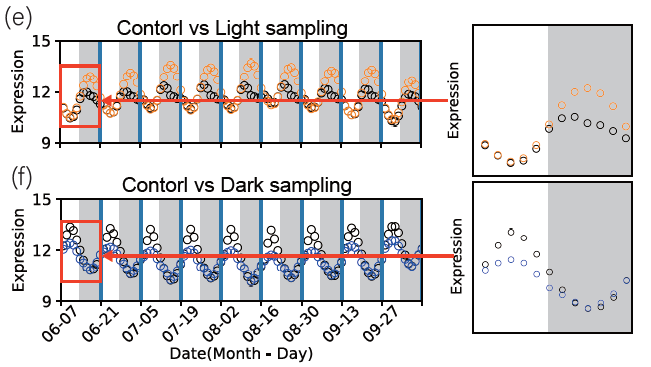

In [ ]:
df = pd.read_csv(r"DayNightOnlydataset_0990Days.csv")

df["ALTC"] = df['ALTC_Control'].str[-3:]

df['Date'] = pd.to_datetime(df['Date'])

df['Hour'] = df['Date'].dt.hour

df_DayTime = df[df["Hour"].isin([1,3,5,7,9,11])]
df_DayTime["DayNight"] = "Day"

df_NightTime = df[df["Hour"].isin([13,15,17,19,21,23])]
df_NightTime["DayNight"] = "Night"

df = pd.concat([df_DayTime , df_NightTime])

del df_DayTime
del df_NightTime

In [ ]:
df_NightOnlySampling = df[(df["ALTC_Experiment"] == "ALTC_08Night_003") & (df["Gene"] == "Os09g0552300")]
df_DayOnlySampling = df[(df["ALTC_Experiment"] == "ALTC_08Day_002") & (df["Gene"] == "Os02g0116000")]

In [ ]:
def Assign_Index(DATAFRAME):
    
    DATAFRAME = DATAFRAME.sort_values('Date')
    Index_List = list(range(1, 109))
    DATAFRAME["Index"] = Index_List
    
    return DATAFRAME

def SliceDataFrame_CalcStats(DATAFRAME , START_INDEX , FINISH_INDEX , STEP):
    
    CorrList_TimeStep = []
    RMSEList_TimeStep = []
    SDList_TimeStep = []
    
    for i in range(START_INDEX , FINISH_INDEX , STEP):
        
        Index_Start = i
        Index_Finish = Index_Start + 12
        
        df_tmp = DATAFRAME.iloc[Index_Start:Index_Finish]
        
        Measurement_List = list(df_tmp["FIT_Correct_Value"])
        Pridict_List = list(df_tmp["FIT_Test_Value"])
        
        Corr = Calc_Corr(df_tmp)
        RMSE = np.sqrt(mean_squared_error(Measurement_List, Pridict_List))
        SD = statistics.stdev(Measurement_List + Pridict_List)
        
        CorrList_TimeStep.append(Corr)
        RMSEList_TimeStep.append(RMSE)
        SDList_TimeStep.append(SD)
    
    return CorrList_TimeStep , RMSEList_TimeStep , SDList_TimeStep

def Calc_Corr(DATAFRAME):
    
    Measurement_List = list(DATAFRAME["FIT_Correct_Value"])
    Pridict_List = list(DATAFRAME["FIT_Test_Value"])

    
    if (len(set(Measurement_List)) == 1) or (len(set(Pridict_List)) == 1):
        Corr = "Zero_variance"
    else:
        Corr = np.corrcoef(Measurement_List, Pridict_List)[0, 1]

    return Corr

def Rouding_List(LIST,DIGITS):
    
    for i in range(len(LIST)):
        Num = LIST[i]
        
        if (type(Num) is str):
            Num = "Nan"
        else:
            Num = round(Num,DIGITS)
        
        LIST[i] = Num
    
    return LIST

In [ ]:
df_NightOnlySampling = Assign_Index(df_NightOnlySampling)
df_DayOnlySampling = Assign_Index(df_DayOnlySampling)

Control_ExpList_NightOnly = list(df_NightOnlySampling["FIT_Control_Value"])
Control_ExpList_DayOnly = list(df_DayOnlySampling["FIT_Control_Value"])

Experiment_ExpList_NightOnly = list(df_NightOnlySampling["FIT_Experiment_Value"])
Experiment_ExpList_DayOnly = list(df_DayOnlySampling["FIT_Experiment_Value"])

Index_List = list(df_NightOnlySampling["Index"])

Control vs Dark Sampling

In [ ]:
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['lines.linewidth'] = 3

plt.rcParams["font.size"] = 12

fig = plt.figure(figsize=(5,1.5))
ax = fig.add_subplot(1, 1, 1)

plt.vlines(12, 0, 20,lw=1.3)
plt.vlines(24, 0, 20,lw=1.3)
plt.vlines(36, 0, 20,lw=1.3)
plt.vlines(48, 0, 20,lw=1.3)
plt.vlines(60, 0, 20,lw=1.3)
plt.vlines(72, 0, 20,lw=1.3)
plt.vlines(84, 0, 20,lw=1.3)
plt.vlines(96, 0, 20,lw=1.3)
plt.vlines(108, 0, 20,lw=1.3)

ax.fill_between([6, 12], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([18, 24], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([30, 36], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([42, 48], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([54, 60], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([66, 72], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([78, 84], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([90, 96], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([102, 108], 0, 20, color='lightgrey', alpha=1)


ax.set_yticks([9, 12, 15])
ax.set_ylim(9, 15)


ax.set_xticks([0, 12, 24, 36, 48, 60,72,84,96,108])
ax.set_xlim(0, 108)

ax.set_xticklabels(["06-07" , "06-21" , "07-05" , "07-19" , "08-02" , "08-16" , "08-30" , "09-13" , "09-27" , "10-04"], rotation=45)

ax.set_xlabel("Date(Month - Day)")
ax.set_ylabel("Expression")

ax.scatter(Index_List,Control_ExpList_NightOnly, color='none' , edgecolor='black',label="Test",rasterized=True)
ax.scatter(Index_List,Experiment_ExpList_NightOnly, color='none' , edgecolor='blue',label="Correct",rasterized=True)

In [ ]:
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['lines.linewidth'] = 3

plt.rcParams["font.size"] = 12

fig = plt.figure(figsize=(5,1.5))
ax = fig.add_subplot(1, 1, 1)

plt.vlines(12, 0, 20,lw=1.3)
plt.vlines(24, 0, 20,lw=1.3)
plt.vlines(36, 0, 20,lw=1.3)
plt.vlines(48, 0, 20,lw=1.3)
plt.vlines(60, 0, 20,lw=1.3)
plt.vlines(72, 0, 20,lw=1.3)
plt.vlines(84, 0, 20,lw=1.3)
plt.vlines(96, 0, 20,lw=1.3)
plt.vlines(108, 0, 20,lw=1.3)

ax.fill_between([6, 12], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([18, 24], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([30, 36], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([42, 48], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([54, 60], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([66, 72], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([78, 84], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([90, 96], 0, 20, color='lightgrey', alpha=1)
ax.fill_between([102, 108], 0, 20, color='lightgrey', alpha=1)


ax.set_yticks([9, 12, 15])
ax.set_ylim(9, 15)

ax.set_xticks([0, 12, 24, 36, 48, 60,72,84,96,108])
ax.set_xlim(0, 108)

ax.set_xticklabels(["06-07" , "06-21" , "07-05" , "07-19" , "08-02" , "08-16" , "08-30" , "09-13" , "09-27" , "10-04"], rotation=45)

ax.set_xlabel("Date(Month - Day)")
ax.set_ylabel("Expression")

ax.scatter(Index_List,Control_ExpList_DayOnly, color='none' , edgecolor='black',label="Test",rasterized=True)
ax.scatter(Index_List,Experiment_ExpList_DayOnly, color='none' , edgecolor='darkorange',label="Correct",rasterized=True)

Extract only the first day of the evaluation day

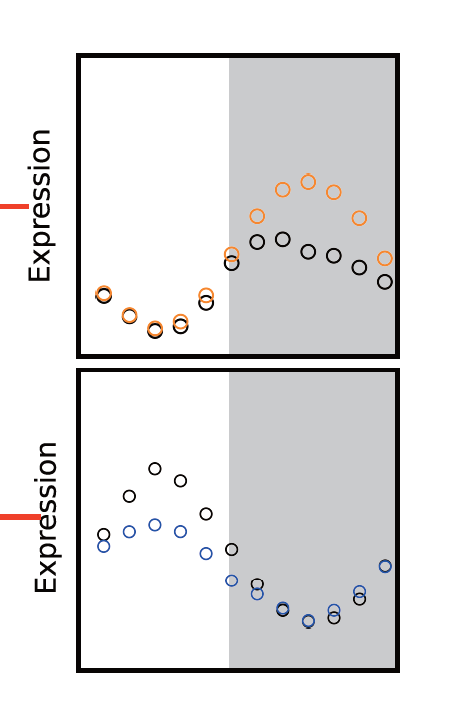

In [ ]:
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams["font.size"] = 12.5

fig = plt.figure(figsize=(2.5,2.5))
ax = fig.add_subplot(1, 1, 1)

ax.fill_between([6, 12.5], 0, 20, color='lightgrey', alpha=1)

ax.set_yticks([10, 15])
ax.set_ylim(10, 15)

ax.set_xticks([0,12.5])
ax.set_xlim(0, 12.5)

ax.set_xticklabels(["06-07" , "06-21"], rotation=45)

ax.set_xlabel("Date(Month - Day)")
ax.set_ylabel("Expression")

ax.scatter(Index_List,Control_ExpList_DayOnly, color='none' , edgecolor='black',label="Test",rasterized=True)
ax.scatter(Index_List,Experiment_ExpList_DayOnly, color='none' , edgecolor='darkorange',label="Correct",rasterized=True)

In [ ]:
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams["font.size"] = 12.5

fig = plt.figure(figsize=(2.5,2.5))
ax = fig.add_subplot(1, 1, 1)

ax.fill_between([6, 12.5], 0, 20, color='lightgrey', alpha=1)

ax.set_yticks([10, 15])
ax.set_ylim(10, 15)

ax.set_xticks([0,12.5])
ax.set_xlim(0, 12.5)

ax.set_xticklabels(["06-07" , "06-21"], rotation=45)

ax.set_xlabel("Date(Month - Day)")
ax.set_ylabel("Expression")

ax.scatter(Index_List,Control_ExpList_NightOnly, color='none' , edgecolor='black',label="Test",rasterized=True)
ax.scatter(Index_List,Experiment_ExpList_NightOnly, color='none' , edgecolor='blue',label="Correct",rasterized=True)

# Fig.5g : Gene expression levels during sampling/nonsampling time

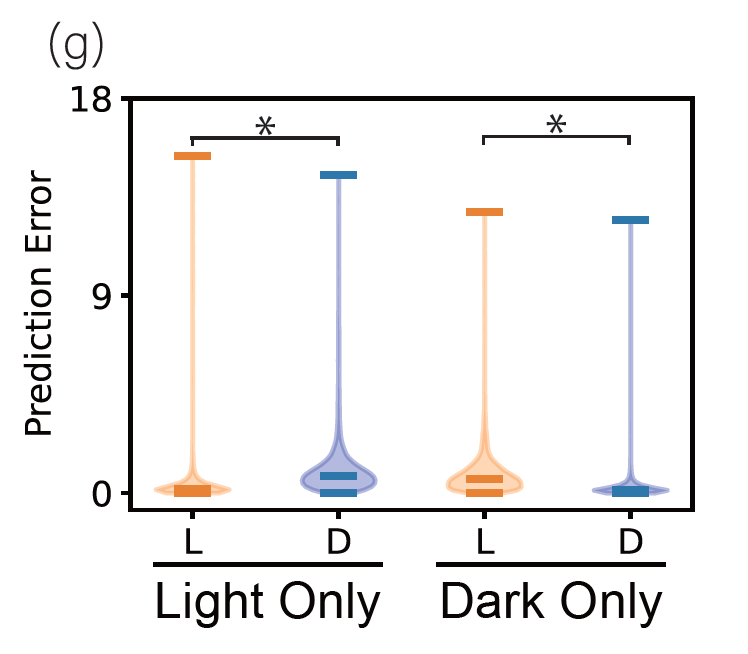

In [ ]:
df = pd.read_csv(r"DayNightOnlydataset_0990Days.csv")

# ALTC列を作る
df["ALTC"] = df['ALTC_Control'].str[-3:]

# Date列をdatatime型にする
df['Date'] = pd.to_datetime(df['Date'])

# 時間だけを取り出す
df['Hour'] = df['Date'].dt.hour

# DayTime ,  NightTimeのサンプリングを区別する
df_DayTime = df[df["Hour"].isin([1,3,5,7,9,11])]
df_DayTime["DayNight"] = "Day"

df_NightTime = df[df["Hour"].isin([13,15,17,19,21,23])]
df_NightTime["DayNight"] = "Night"

# 1つのdfにする
df = pd.concat([df_DayTime , df_NightTime])

In [ ]:
# Day0Con9 / Night0Con9 でDay,Nightでフィルタリング
df_Day0Con9_Day = df[(df["Type"] == "Day0Con9") & (df["DayNight"] == "Day")]
df_Day0Con9_Day["Expression_Diff"] = abs(df_Day0Con9_Day["FIT_Experiment_Value"] - df_Day0Con9_Day["FIT_Control_Value"])

df_Day0Con9_Night = df[(df["Type"] == "Day0Con9") & (df["DayNight"] == "Night")]
df_Day0Con9_Night["Expression_Diff"] = abs(df_Day0Con9_Night["FIT_Experiment_Value"] - df_Day0Con9_Night["FIT_Control_Value"])

df_Night0Con9_Day = df[ (df["Type"] == "Night0Con9") & (df["DayNight"] == "Day")]
df_Night0Con9_Day["Expression_Diff"] = abs(df_Night0Con9_Day["FIT_Experiment_Value"] - df_Night0Con9_Day["FIT_Control_Value"])

df_Night0Con9_Night = df[ (df["Type"] == "Night0Con9") & (df["DayNight"] == "Night")]
df_Night0Con9_Night["Expression_Diff"] = abs(df_Night0Con9_Night["FIT_Experiment_Value"] - df_Night0Con9_Night["FIT_Control_Value"])

In [ ]:
# 各ALTCのGeneごとにRMSEを算出する
def calculate_rmse(group):
    actual = group['FIT_Control_Value']
    predicted = group['FIT_Experiment_Value']
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

RMSE_df_Day0Con9_Day = df_Day0Con9_Day.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_Day0Con9_Night = df_Day0Con9_Night.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_Night0Con9_Day = df_Night0Con9_Day.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_Night0Con9_Night = df_Night0Con9_Night.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
vio = ax.violinplot([RMSE_df_Day0Con9_Day["RMSE"] , RMSE_df_Day0Con9_Night["RMSE"] , RMSE_df_Night0Con9_Day["RMSE"] , RMSE_df_Night0Con9_Night["RMSE"]]
                    ,showmedians=True)

for IO , body in zip((["in" , "out" , "in" , "out"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "in":
        body.set_color("darkorange")        
        
    else:
        body.set_color('blue')
    
    body.set_linewidth(1)

plt.tick_params(labelsize=14)

ax.set_xticks([1, 2, 3 , 4])
labels = ["Light","Dark","Light","Dark"]
ax.set_xticklabels(labels, fontsize=14)

ax.set_yticks([0 , 8 , 16])
plt.ylabel("RMSE", fontsize=14)

plt.savefig(r"Fig//Sampled_Unsampled_Time_PrdAcc.svg" , dpi = 2000)

# Fig6a

In [17]:
df_Path =  r"df_all_fit_filterd.csv"

df = dd.read_csv(df_Path , assume_missing=True, dtype = 'object').compute()
df = df[ (df["EnvCount"] == "3") | (df["EnvCount"] == "08") | (df["EnvCount"] == "24")]
df = df[["Time",'FIT_Test_Value', 'ALTC', 'EnvCount' , 'Gene','Temperature', 'FIT_Reference_Value', 'DN']]
df = df.astype({'FIT_Test_Value': float , 'FIT_Reference_Value' : float})
df = df[ (df["ALTC"] == "ALTC_08_001") & (df["Gene"] == "Os07g0134500")]

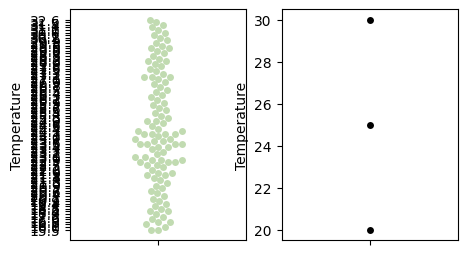

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# サンプルデータの生成
#df1 = pd.DataFrame({"Temperature": [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]})
df2 = pd.DataFrame({"Temperature": [20, 25 , 30]})


import seaborn as sns
import matplotlib.pyplot as plt

# データフレームをソートする
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3))

# 1つ目のサブプロット: ソートされたデータフレームに基づくswarmplot
sns.swarmplot(data = df_sorted, y='Temperature', ax=ax1 , color = "#C1DBB1")

# 2つ目のサブプロット: df2に基づくswarmplot
sns.swarmplot(data=df2, y='Temperature', ax=ax2 , color = "black")


plt.savefig(r"fig//test.svg" , dpi = 2000)


# Fig6 c : Prediction error for each sample size simulation conditions within and outside the training data temperature range

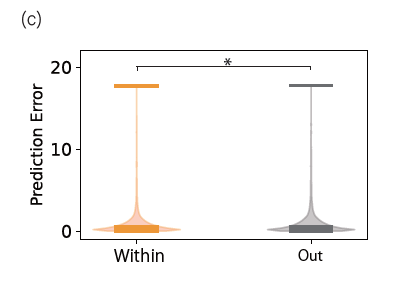

In [ ]:
df_Path =  r"df_all_fit_filterd.csv"

df = dd.read_csv(df_Path , assume_missing=True, dtype = 'object').compute()
df = df[ (df["EnvCount"] == "3") | (df["EnvCount"] == "08") | (df["EnvCount"] == "24")]
df = df[["Time",'FIT_Test_Value', 'ALTC', 'EnvCount' , 'Gene','Temperature', 'FIT_Reference_Value', 'DN']]
df = df.astype({'FIT_Test_Value': float , 'FIT_Reference_Value' : float})

In [ ]:
#/**
# * @Parameter DATAFRAME(data.frame) WeatherConditon data.frame used for each ALTC
# * Extract the highest and lowest sampling temperatures for each ALTC
# * @return data.frame
# */

def Creatdf_MaxMinTemperature_fromALTC(DATAFRAME , DATAFRAME_ENVID):
    
    df_ALTC_MaxMinTemp_List = []

    for ALTC in set(DATAFRAME["ALTC"]):
        
        df_tmp = DATAFRAME[DATAFRAME["ALTC"] == ALTC]
        EnvID_List = (df_tmp.iloc[0].to_list())[1:]
        
        Day_Temperature_List = []
        Night_Temperature_List = []  
        
        for EnvID in EnvID_List:
            
            df_EnvID_tmp = DATAFRAME_ENVID[DATAFRAME_ENVID["WeatherCondition"] == EnvID]
            
            Day_Temperature = (list(df_EnvID_tmp["LightTemperature"])[0])
            Night_Temperature = (list(df_EnvID_tmp["DarkTemperature"])[0])
            
            Day_Temperature_List.append(Day_Temperature)
            Night_Temperature_List.append(Night_Temperature)

        Day_Temperature_List = [int(float(i)) for i in Day_Temperature_List if i != "NaN" and not math.isnan(float(i))]
        Night_Temperature_List = [int(float(i)) for i in Night_Temperature_List if i != "NaN" and not math.isnan(float(i))]
        
        df_ALTC_MaxMinTemp_List.append([ALTC , "Day" , min(Day_Temperature_List) , max(Day_Temperature_List)])
        df_ALTC_MaxMinTemp_List.append([ALTC , "Night" , min(Night_Temperature_List) , max(Night_Temperature_List)])

    df_ALTC_MaxMinTemp = pd.DataFrame(df_ALTC_MaxMinTemp_List, columns=['ALTC', "DayNight" , "MinTemperature" , "MaxTemperature"])
    
    return df_ALTC_MaxMinTemp

In [ ]:
df_WeatherConditon_Path = r"Weather Conditon\WeatherConditon.csv"
df_96_WC_Path = r"Weather Conditon\Samplesize96_ALTC.csv"

df_EnvID = dd.read_csv(df_WeatherConditon_Path , assume_missing=True, dtype = 'object').compute()
df_8_EnvID = dd.read_csv(df_96_WC_Path , assume_missing=True, dtype = 'object').compute()

# Creating a dataframe of minimum and maximum temperatures for all ALTCs
df_ALTC_MaxMinTemp_List = []

for dataframe in ([df_8_EnvID]):
    
    df_tmp = Creatdf_MaxMinTemperature_fromALTC(dataframe , df_EnvID)
    df_ALTC_MaxMinTemp_List.append(df_tmp)

df_ALTC_MaxMinTemp = pd.concat(df_ALTC_MaxMinTemp_List)

In [ ]:
def in_sampling_range(row , DAY_MIN_TEMPERATURE , DAY_MAX_TEMPERATURE):
    
    if (DAY_MIN_TEMPERATURE <= row['Temperature'] ) and (row['Temperature'] <= DAY_MAX_TEMPERATURE ):
        return 1
    
    elif row['Temperature'] > DAY_MAX_TEMPERATURE:
        return 0
    
    else:
        return -1

In [ ]:
# Is the memory at 108 of each ALTC within the minimum temperature <= n <= maximum temperature?
df_wt_all_list = []

df_wt = df[["ALTC" , "Time" ,"DN","Temperature"]]
df_wt = df_wt.drop_duplicates(subset=["ALTC" , 'Time'])

df_wt = df_wt.astype({'Temperature': float})

for ALTC in list(set(df_ALTC_MaxMinTemp["ALTC"])):
    
    df_ALTC_MaxMinTemp_tmp = df_ALTC_MaxMinTemp[df_ALTC_MaxMinTemp["ALTC"] == ALTC]
    
    df_wt_day_tmp = df_wt[(df_wt["ALTC"] == ALTC) & (df_wt["DN"] == "Day")]
    df_wt_night_tmp = df_wt[(df_wt["ALTC"] == ALTC) & (df_wt["DN"] == "Night")]
        
    Day_Max_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Day"])["MaxTemperature"])[0]
    Day_Min_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Day"])["MinTemperature"])[0]
    
    Night_Max_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Night"])["MaxTemperature"])[0]
    Might_Min_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Night"])["MaxTemperature"])[0]
    
    if (len(df_wt_day_tmp) == 0) or (len(df_wt_night_tmp) == 0):
        pass
    else:
        df_wt_day_tmp['InSamplingRange'] = df_wt_day_tmp.apply(lambda row: in_sampling_range(row, Day_Min_Temperature, Day_Max_Temperature), axis=1)
        df_wt_night_tmp['InSamplingRange'] = df_wt_night_tmp.apply(lambda row: in_sampling_range(row, Might_Min_Temperature, Night_Max_Temperature), axis=1)
    
        df_wt_all_list.append(df_wt_day_tmp)
        df_wt_all_list.append(df_wt_night_tmp)

df_wt_all = pd.concat(df_wt_all_list)
df_wt_all = df_wt_all[["ALTC" , "Time","InSamplingRange"]]

In [ ]:
df_all = pd.merge(df , df_wt_all , on = ["ALTC","Time"] , how = "inner")
df_all["Expression_Diff"] = abs(df_all["FIT_Test_Value"] - df_all["FIT_Reference_Value"])

In [ ]:
df_all.to_csv(r"df_SamplingInOutRange.csv")

In [ ]:
df_8_Inrange = (df_all[(df_all["EnvCount"] == "08") & (df_all["InSamplingRange"] == 1)])
df_8_OutRange = (df_all[(df_all["EnvCount"] == "08") & (df_all["InSamplingRange"] != 1)])

In [ ]:
# 各ALTCのGeneごとにRMSEを算出する
def calculate_rmse(group):
    actual = group['FIT_Test_Value']
    predicted = group['FIT_Reference_Value']
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

RMSE_df_8_Inrange = df_8_Inrange.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_8_OutRange = df_8_OutRange.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 3))
vio = ax.violinplot([list(RMSE_df_8_Inrange["RMSE"]) , list(RMSE_df_8_OutRange["RMSE"])] 
                    ,showmedians=True)

for IO , body in zip((["in" , "out"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "in":
        body.set_color("orange")        
        
    else:
        body.set_color('dimgrey')
    
    body.set_linewidth(1)

plt.tick_params(labelsize=14)

ax.set_xticks([1, 2])
labels = ["Within","Out"]
ax.set_xticklabels(labels, fontsize=14)
ax.set(xlabel=None)


ax.set_yticks([0.0 , 8 , 16])
ax.set_ylim(-1, 18)
plt.tick_params(labelsize=15)
plt.ylabel("RMSE", fontsize=14)

plt.savefig(r"Fig//Sampled_Unsampled_Temp_PrdAcc.svg" , dpi = 2000)

# Fig6 b : Prediction error for each sample size simulation conditions within and outside the training data temperature range

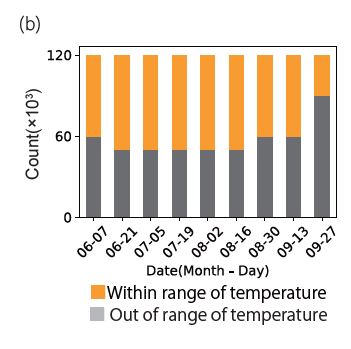

In [ ]:
df_Path =  r"df_all_fit_filterd.csv"

df = dd.read_csv(df_Path , assume_missing=True, dtype = 'object').compute()
df = df[ (df["EnvCount"] == "3") | (df["EnvCount"] == "08") | (df["EnvCount"] == "24")]
df = df[["Time",'FIT_Test_Value', 'ALTC', 'EnvCount' , 'Gene','Temperature', 'FIT_Reference_Value', 'DN']]
df = df.astype({'FIT_Test_Value': float , 'FIT_Reference_Value' : float})

In [ ]:
#/**
# * @Parameter DATAFRAME(data.frame) WeatherConditon data.frame used for each ALTC
# * Extract the highest and lowest sampling temperatures for each ALTC
# * @return data.frame
# */

def Creatdf_MaxMinTemperature_fromALTC(DATAFRAME , DATAFRAME_ENVID):
    
    df_ALTC_MaxMinTemp_List = []

    for ALTC in set(DATAFRAME["ALTC"]):
        
        df_tmp = DATAFRAME[DATAFRAME["ALTC"] == ALTC]
        EnvID_List = (df_tmp.iloc[0].to_list())[1:]
        
        Day_Temperature_List = []
        Night_Temperature_List = []  
        
        for EnvID in EnvID_List:
            
            df_EnvID_tmp = DATAFRAME_ENVID[DATAFRAME_ENVID["WeatherCondition"] == EnvID]
            
            Day_Temperature = (list(df_EnvID_tmp["LightTemperature"])[0])
            Night_Temperature = (list(df_EnvID_tmp["DarkTemperature"])[0])
            
            Day_Temperature_List.append(Day_Temperature)
            Night_Temperature_List.append(Night_Temperature)

        Day_Temperature_List = [int(float(i)) for i in Day_Temperature_List if i != "NaN" and not math.isnan(float(i))]
        Night_Temperature_List = [int(float(i)) for i in Night_Temperature_List if i != "NaN" and not math.isnan(float(i))]
        
        df_ALTC_MaxMinTemp_List.append([ALTC , "Day" , min(Day_Temperature_List) , max(Day_Temperature_List)])
        df_ALTC_MaxMinTemp_List.append([ALTC , "Night" , min(Night_Temperature_List) , max(Night_Temperature_List)])

    df_ALTC_MaxMinTemp = pd.DataFrame(df_ALTC_MaxMinTemp_List, columns=['ALTC', "DayNight" , "MinTemperature" , "MaxTemperature"])
    
    return df_ALTC_MaxMinTemp

In [ ]:
df_WeatherConditon_Path = r"Weather Conditon\WeatherConditon.csv"
df_36_WC_Path = r"Weather Conditon\SampleSize36_ALTC.csv"
df_96_WC_Path = r"Weather Conditon\Samplesize96_ALTC.csv"
df_288_WC_Path = r"Weather Conditon\Samplesize288_ALTC.csv"

df_EnvID = dd.read_csv(df_WeatherConditon_Path , assume_missing=True, dtype = 'object').compute()
df_3_EnvID = dd.read_csv(df_36_WC_Path , assume_missing=True, dtype = 'object').compute()
df_8_EnvID = dd.read_csv(df_96_WC_Path , assume_missing=True, dtype = 'object').compute()
df_24_EnvID = dd.read_csv(df_288_WC_Path , assume_missing=True, dtype = 'object').compute()

# Creating a dataframe of minimum and maximum temperatures for all ALTCs
df_ALTC_MaxMinTemp_List = []

for dataframe in ([df_3_EnvID , df_8_EnvID , df_24_EnvID]):
    
    df_tmp = Creatdf_MaxMinTemperature_fromALTC(dataframe , df_EnvID)
    df_ALTC_MaxMinTemp_List.append(df_tmp)

df_ALTC_MaxMinTemp = pd.concat(df_ALTC_MaxMinTemp_List)

In [ ]:
def in_sampling_range(row , DAY_MIN_TEMPERATURE , DAY_MAX_TEMPERATURE):
    
    if (DAY_MIN_TEMPERATURE <= row['Temperature'] ) and (row['Temperature'] <= DAY_MAX_TEMPERATURE ):
        return 1
    
    elif row['Temperature'] > DAY_MAX_TEMPERATURE:
        return 0
    
    else:
        return -1

In [ ]:
# Is the memory at 108 of each ALTC within the minimum temperature <= n <= maximum temperature?
df_wt_all_list = []

df_wt = df[["ALTC" , "Time" ,"DN","Temperature"]]
df_wt = df_wt.drop_duplicates(subset=["ALTC" , 'Time'])

df_wt = df_wt.astype({'Temperature': float})

for ALTC in list(set(df_ALTC_MaxMinTemp["ALTC"])):
    
    df_ALTC_MaxMinTemp_tmp = df_ALTC_MaxMinTemp[df_ALTC_MaxMinTemp["ALTC"] == ALTC]
    
    df_wt_day_tmp = df_wt[(df_wt["ALTC"] == ALTC) & (df_wt["DN"] == "Day")]
    df_wt_night_tmp = df_wt[(df_wt["ALTC"] == ALTC) & (df_wt["DN"] == "Night")]
        
    Day_Max_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Day"])["MaxTemperature"])[0]
    Day_Min_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Day"])["MinTemperature"])[0]
    
    Night_Max_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Night"])["MaxTemperature"])[0]
    Might_Min_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Night"])["MaxTemperature"])[0]
    
    if (len(df_wt_day_tmp) == 0) or (len(df_wt_night_tmp) == 0):
        pass
    else:
        df_wt_day_tmp['InSamplingRange'] = df_wt_day_tmp.apply(lambda row: in_sampling_range(row, Day_Min_Temperature, Day_Max_Temperature), axis=1)
        df_wt_night_tmp['InSamplingRange'] = df_wt_night_tmp.apply(lambda row: in_sampling_range(row, Might_Min_Temperature, Night_Max_Temperature), axis=1)
    
        df_wt_all_list.append(df_wt_day_tmp)
        df_wt_all_list.append(df_wt_night_tmp)

df_wt_all = pd.concat(df_wt_all_list)
df_wt_all = df_wt_all[["ALTC" , "Time","InSamplingRange"]]

In [ ]:
df_all = pd.merge(df , df_wt_all , on = ["ALTC","Time"] , how = "inner")
df_all["Expression_Diff"] = abs(df_all["FIT_Test_Value"] - df_all["FIT_Reference_Value"])

In [ ]:
df_all.to_csv(r"df_SamplingInOutRange.csv")

In [ ]:
df_3_Inrange = (df_all[(df_all["EnvCount"] == "3") & (df_all["InSamplingRange"] == 1)])['Expression_Diff']
df_3_OutRange = (df_all[(df_all["EnvCount"] == "3") & (df_all["InSamplingRange"] != 1)])['Expression_Diff']

df_8_Inrange = (df_all[(df_all["EnvCount"] == "08") & (df_all["InSamplingRange"] == 1)])['Expression_Diff']
df_8_OutRange = (df_all[(df_all["EnvCount"] == "08") & (df_all["InSamplingRange"] != 1)])['Expression_Diff']

df_24_Inrange = (df_all[(df_all["EnvCount"] == "24") & (df_all["InSamplingRange"] == 1)])['Expression_Diff']
df_24_OutRange = (df_all[(df_all["EnvCount"] == "24") & (df_all["InSamplingRange"] != 1)])['Expression_Diff']

In [ ]:
df_3_Inrange_df = df_3_Inrange.to_frame()
df_3_Inrange_df["Type"] = "in"

df_3_OutRange_df = df_3_OutRange.to_frame()
df_3_OutRange_df["Type"] = "out"

df_3_sns = pd.concat([df_3_Inrange_df , df_3_OutRange_df])


df_8_Inrange_df = df_8_Inrange.to_frame()
df_8_Inrange_df["Type"] = "in"

df_8_OutRange_df = df_8_OutRange.to_frame()
df_8_OutRange_df["Type"] = "out"

df_8_sns = pd.concat([df_8_Inrange_df , df_8_OutRange_df])

df_3_Inrange_df = df_3_Inrange.to_frame()
df_3_Inrange_df["Type"] = "in"

df_3_OutRange_df = df_3_OutRange.to_frame()
df_3_OutRange_df["Type"] = "out"

df_3_sns = pd.concat([df_3_Inrange_df , df_3_OutRange_df])



df_8_Inrange_df = df_8_Inrange.to_frame()
df_8_Inrange_df["Type"] = "in"

df_8_OutRange_df = df_8_OutRange.to_frame()
df_8_OutRange_df["Type"] = "out"

df_8_sns = pd.concat([df_8_Inrange_df , df_8_OutRange_df])



df_24_Inrange_df = df_24_Inrange.to_frame()
df_24_Inrange_df["Type"] = "in"

df_24_OutRange_df = df_24_OutRange.to_frame()
df_24_OutRange_df["Type"] = "out"

df_24_sns = pd.concat([df_24_Inrange_df , df_24_OutRange_df])

df_24_Inrange_df = df_24_Inrange.to_frame()
df_24_Inrange_df["Type"] = "in"

df_24_OutRange_df = df_24_OutRange.to_frame()
df_24_OutRange_df["Type"] = "out"

df_24_sns = pd.concat([df_24_Inrange_df , df_24_OutRange_df])

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 3))
vio = ax.violinplot([list(df_3_Inrange_df["Expression_Diff"]) , list(df_3_OutRange_df["Expression_Diff"])] 
                    ,showmedians=True)

for IO , body in zip((["in" , "out"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "in":
        body.set_color("tomato")        
        
    else:
        body.set_color('cornflowerblue')
    
    body.set_linewidth(1)

plt.tick_params(labelsize=14)

ax.set_xticks([1, 2])
labels = ["Within","Out"]
ax.set_xticklabels(labels, fontsize=14)
ax.set(xlabel=None)


ax.set_yticks([0.0 , 10 , 20])
ax.set_ylim(-1, 22)
plt.tick_params(labelsize=15)
plt.ylabel("Prediction Error", fontsize=14)

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 3))
vio = ax.violinplot([list(df_8_Inrange_df["Expression_Diff"]) , list(df_8_OutRange_df["Expression_Diff"])] 
                    ,showmedians=True)

for IO , body in zip((["in" , "out"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "in":
        body.set_color("tomato")        
        
    else:
        body.set_color('cornflowerblue')
    
    body.set_linewidth(1)

plt.tick_params(labelsize=14)

ax.set_xticks([1, 2])
labels = ["in","out"]
ax.set_xticklabels(labels, fontsize=14)
ax.set(xlabel=None)


ax.set_yticks([0.0 , 10 , 20])
ax.set_ylim(-1, 22)
plt.tick_params(labelsize=15)
plt.ylabel("Prediction Error", fontsize=14)

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 3))
vio = ax.violinplot([list(df_24_Inrange_df["Expression_Diff"]) , list(df_24_OutRange_df["Expression_Diff"])] 
                    ,showmedians=True)

for IO , body in zip((["in" , "out"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "in":
        body.set_color("tomato")        
        
    else:
        body.set_color('cornflowerblue')
    
    body.set_linewidth(1)

plt.tick_params(labelsize=14)

ax.set_xticks([1, 2])
labels = ["in","out"]
ax.set_xticklabels(labels, fontsize=14)
ax.set(xlabel=None)
zz

ax.set_yticks([0.0 , 10 , 20])
ax.set_ylim(-1, 22)
plt.tick_params(labelsize=15)
plt.ylabel("Prediction Error", fontsize=14)

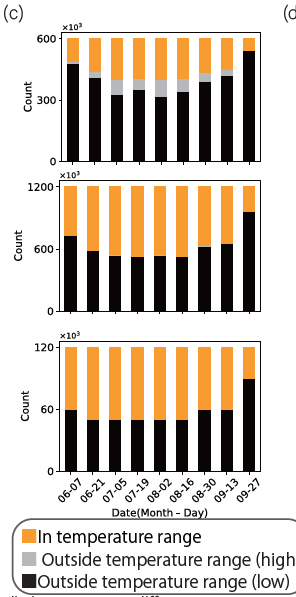

In [ ]:
df_path = r"df_SamplingInOutRange.csv"
df = dd.read_csv(df_path , assume_missing=True, dtype = 'object').compute()
df = df[["Time" , 'EnvCount','InSamplingRange']]

In [ ]:
dfat_path = r"df_all_fit_filterd.csv"
df_at = dd.read_csv(dfat_path , assume_missing=True, dtype = 'object').compute()
df_at = df_at[["Time" , "Date"]]
df_at = df_at.drop_duplicates()

df_at["Date"] = pd.to_datetime(df_at["Date"])
df_at["Date"] = df_at["Date"].dt.date

In [ ]:
df = pd.merge(df,df_at , on = "Time" , how = "inner")

In [ ]:
df_8 = df[df["EnvCount"] == "08"]

In [ ]:
df_8_gb = df_8.groupby(["Date" , 'InSamplingRange'], as_index=False).count()
df_8_gb = df_8_gb[["Date" , "InSamplingRange" , "EnvCount"]]
df_8_gb = df_8_gb.rename(columns={'EnvCoun': 'Count'})
df_8_gb['Date'] = pd.to_datetime(df_8_gb['Date'])
df_8_gb['Date'] = df_8_gb['Date'].dt.strftime('%m-%d')

In [ ]:
# 細かく区別する必要はないので、-1,0をつぶして全部0にする。
df_8_gb['InSamplingRange'] = df_8_gb['InSamplingRange'].replace("-1", "0")
df_8_gb = df_8_gb.groupby(['Date', 'InSamplingRange'], as_index=False).sum()

In [ ]:
sum((df_8_gb[df_8_gb["InSamplingRange"] == "1"])["EnvCount"])

In [ ]:
df_8_gb

In [ ]:
sum(df_8_gb["EnvCount"])

In [ ]:
# Group by 'Date' and 'InSamplingRange', then count occurrences (same as before)
grouped = df_8_gb.groupby(['Date', 'InSamplingRange'])['EnvCount'].sum().unstack(fill_value=0)

# -1が気温レンジ外(低温) 0が気温レンジ外(高温) 1が気温レンジ内
colors = ['dimgrey', 'orange']   # Order: -1, 0, 1

# Create a stacked histogram without normalization
fig, ax = plt.subplots(figsize=(4.5, 3))

ax.set_yticks([0, 300000, 600000])
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   # こっちを先に書くこと。
ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3単位の指数で表示する。


grouped.plot(kind='bar', stacked=True, color=colors, ax=ax)

plt.xticks(rotation=45)

# Set plot labels and title
ax.set_xlabel('Date(Month - Day)' , fontsize = 13)
ax.set_ylabel('Count',  fontsize = 13)
#ax.set_title('Number of inside and outside the temperature range on each date_8Env')

# Hide the legend
ax.get_legend().remove()

ax.tick_params(labelsize=13)

# Show the plot
plt.savefig(r"Fig\\Number of inside and outside the temperature range on each date_96.svg", dpi=2000)
plt.show()


# Fig6 d : Prediction accuracy outside training data range with 12 samples under 1 weather condition

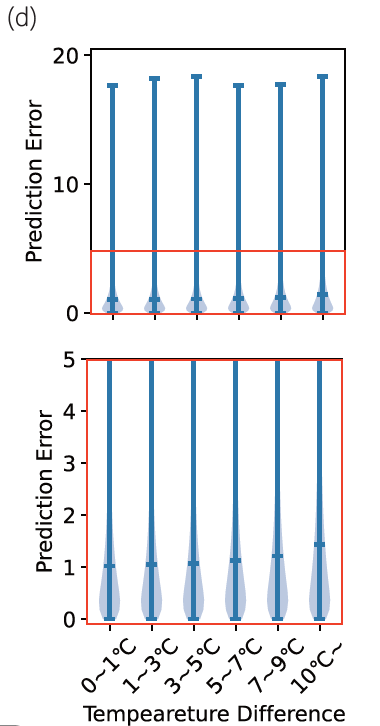

In [ ]:
df_Path =  r"df_all_fit_filterd.csv"
UseColumns = ['FIT_Test_Value', 'ALTC', 'EnvCount', 'Gene' , 'FIT_Reference_Value', 'DN',"Temperature" , "Time"]
df = dd.read_csv(df_Path , usecols=UseColumns , assume_missing=True, dtype = 'object').compute()

df = df.astype({'FIT_Test_Value': float , 'FIT_Reference_Value' : float , "Temperature" : float})

df = df[df["EnvCount"] == "1"]

df = df.sort_values('ALTC')

df["Expression_Diff"] = abs(df["FIT_Reference_Value"] - df["FIT_Test_Value"])

In [ ]:
EnvID_Path = r"Weather Conditon\WeatherConditon.csv"
df_WC = dd.read_csv(EnvID_Path, assume_missing=True, dtype = 'object').compute()
df_WC = df_WC[['WeatherCondition' ,'LightTemperature','DarkTemperature']]

df_WC = df_WC.dropna(subset=['LightTemperature' , "DarkTemperature"])
df_WC['WeatherCondition'] = df_WC['WeatherCondition'].astype(int)
df_WC['LightTemperature'] = df_WC['LightTemperature'].astype(int)
df_WC['DarkTemperature'] = df_WC['DarkTemperature'].astype(int)


df_WC = df_WC[df_WC['WeatherCondition'] <= 73]

In [ ]:
df_WC["WeatherCondition"] = df['ALTC'].unique().tolist()
df_WC = df_WC.rename(columns={'WeatherCondition': 'ALTC'})

In [ ]:
df_all_list = []
for ALTC in (list(set(df["ALTC"]))):
    for DayNight in (["Day" , "Night"]):
        
        df_tmp = df[ (df["ALTC"] == ALTC) & (df["DN"] == DayNight)]
        
        df_tmp_EnvID = df_WC[df_WC["ALTC"] == ALTC]
        LighTemperature = int(list(df_tmp_EnvID["LightTemperature"])[0])
        DarkTemperature = int(list(df_tmp_EnvID["DarkTemperature"])[0])
        
        
        if DayNight == "Day":
            df_tmp["Temperature_Diff"] = abs(df_tmp["Temperature"] - LighTemperature)
    
        else:
            df_tmp["Temperature_Diff"] = abs(df_tmp["Temperature"] - DarkTemperature)
        
        df_all_list.append(df_tmp)

df_all = pd.concat(df_all_list)
df_all["Tempearature_Range"] = df_all['Temperature_Diff'].apply(lambda x: min(10, int(x) // 2 * 2))

In [ ]:
def round_temperature(value):
    if value < 1:
        return 0
    elif value < 3:
        return 2
    elif value < 5:
        return 4
    elif value < 7:
        return 6
    
    elif value < 9:
        return 8
    
    else:
        return 10

df_all['Tempearature_Range'] = df_all['Tempearature_Range'].apply(lambda x: round_temperature(x))

In [ ]:
df_all = df_all.sort_values(['ALTC', 'Gene' , "Time"], ascending=[True, True , False])

In [ ]:
# 各ALTCのGeneごとにRMSEを算出する
def calculate_rmse(group):
    actual = group['FIT_Test_Value']
    predicted = group['FIT_Reference_Value']
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

RMSE_df_0Diff = (df_all[df_all["Tempearature_Range"] == 0]).groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_2Diff = (df_all[df_all["Tempearature_Range"] == 2]).groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_4Diff = (df_all[df_all["Tempearature_Range"] == 4]).groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_6Diff = (df_all[df_all["Tempearature_Range"] == 6]).groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_8Diff = (df_all[df_all["Tempearature_Range"] == 8]).groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_10Diff = (df_all[df_all["Tempearature_Range"] == 10]).groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')

In [ ]:
RMSE_df_10Diff

In [ ]:
RMSE_df_0Diff

In [ ]:
fig, ax = plt.subplots(figsize=(2.8 , 1.5))
ax.violinplot([RMSE_df_0Diff["RMSE"] , RMSE_df_2Diff["RMSE"] , RMSE_df_4Diff["RMSE"],
               RMSE_df_6Diff["RMSE"] , RMSE_df_8Diff["RMSE"] , RMSE_df_10Diff["RMSE"]], showmedians=True)

plt.ylabel("RMSE",fontsize=13)
plt.xlabel("Tempeareture difference",fontsize=13)

labels = ["0~1℃", "1~3℃", "3~5℃", "5~7℃", "7~9℃", "10℃~"]
ax.set_xticks([1, 2, 3, 4, 5, 6]) 
ax.set_xticklabels(labels)
plt.xticks(rotation=45)

ax.tick_params(labelsize = 13)

ax.set_yticks([0 , 9 , 18])
ax.set_ylim(-0.1, 18.5)

plt.savefig(r"Fig//Unsampled_Temp_PrdAcc_12Sample.svg" , dpi = 2000)

In [ ]:
fig, ax = plt.subplots(figsize=(2.8 , 1.5))
ax.violinplot([RMSE_df_0Diff["RMSE"] , RMSE_df_2Diff["RMSE"] , RMSE_df_4Diff["RMSE"],
               RMSE_df_6Diff["RMSE"] , RMSE_df_8Diff["RMSE"] , RMSE_df_10Diff["RMSE"]], showmedians=True)
plt.ylabel("RMSE",fontsize=13)
plt.xlabel("Tempeareture difference",fontsize=13)

labels = ["0~1℃", "1~3℃", "3~5℃", "5~7℃", "7~9℃", "10℃~"]
ax.set_xticks([1, 2, 3, 4, 5, 6])  
ax.set_xticklabels(labels)

plt.xticks(rotation=45)
ax.tick_params(labelsize = 13)

ax.set_yticks([0 , 2.5 , 5])
ax.set_ylim(-0.1, 5)

plt.savefig(r"Fig//Unsampled_Temp_PrdAcc_12Sample_0to5.svg" , dpi = 2000)

Kruskal-Wallis and Steel-Dwass test

In [ ]:
Cluster1_List = Diff_List[0]
Cluster2_List = Diff_List[1]
Cluster3_List = Diff_List[2]
Cluster4_List = Diff_List[3]
Cluster5_List = Diff_List[4]

kruskal(Cluster1_List , Cluster2_List , Cluster3_List , Cluster4_List, Cluster5_List)

df_Check = df_all[["Expression_Diff" , "Tempearature_Range"]]

sp.posthoc_dscf(df_Check , val_col='Expression_Diff', group_col='Tempearature_Range')

# Fig 7a Prediction accuracy when the training data of the reference FIT model is limited to the light/dark only.

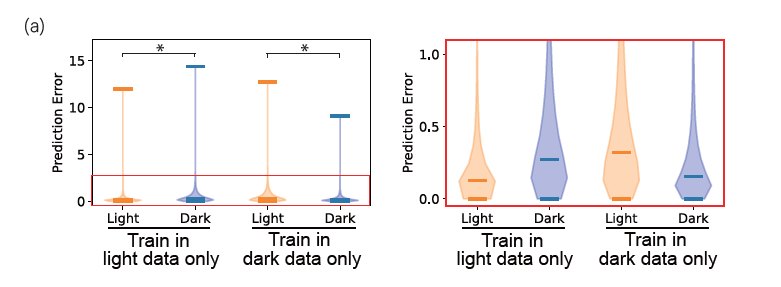

In [ ]:
df_0990 = dd.read_csv(r"DayNightOnlydataset_0990Days.csv",assume_missing=True).compute()
df_0990 = df_0990[ (df_0990["Type"] == "Day0Con9") | (df_0990["Type"] == "Con9Night0")]
Day_Night_Bad_List = list(set(df_0990["Gene"]))

In [ ]:
# データの読み込み
df_DayOnly = dd.read_csv(r"df_DayOnly.csv",assume_missing=True).compute()
df_DayOnly["Expression_Diff"] = abs( (df_DayOnly["Expression"]) - (df_DayOnly["FIT_Reference_Value"]))

df_NightOnly = dd.read_csv(r"df_NightOnly.csv",assume_missing=True).compute()
df_NightOnly["Expression_Diff"] = abs( (df_NightOnly["Expression"]) - (df_NightOnly["FIT_Reference_Value"]))

In [ ]:
# Radiationが0か否かでフィルタリング
df_Day_DO = df_DayOnly[df_DayOnly["Radiation"] != 0]
df_Night_DO = df_DayOnly[df_DayOnly["Radiation"] == 0]

df_Day_NO = df_NightOnly[df_NightOnly["Radiation"] != 0]
df_Night_NO = df_NightOnly[df_NightOnly["Radiation"] == 0]

In [ ]:
# 各ALTCのGeneごとにRMSEを算出する
def calculate_rmse(group):
    actual = group['Expression']
    predicted = group['FIT_Reference_Value']
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

df_Day_DO = df_Day_DO.groupby(['Gene']).apply(calculate_rmse).reset_index(name='RMSE')
df_Night_DO = df_Night_DO.groupby(['Gene']).apply(calculate_rmse).reset_index(name='RMSE')
df_Day_NO = df_Day_NO.groupby(['Gene']).apply(calculate_rmse).reset_index(name='RMSE')
df_Night_NO = df_Night_NO.groupby(['Gene']).apply(calculate_rmse).reset_index(name='RMSE')

In [ ]:
df_gb_CorrMean = df.groupby(["ALTC",'EnvCount'], as_index=False).mean(numeric_only=True)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

vio = ax.violinplot([df_Day_DO["RMSE"] , df_Night_DO["RMSE"] , df_Day_NO["RMSE"] , df_Night_NO["RMSE"]], showmedians=True)

for IO , body in zip((["Light" , "Dark" , "Light" , "Dark"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "Light":
        body.set_color("darkorange")        
    
    elif IO == "Dark":
        body.set_color("blue")

    
    body.set_linewidth(1)


ax.set_xticks([1, 2 , 3 , 4])
labels = ["Light" , "Dark" , "Light" , "Dark"]
ax.set_xticklabels(labels, fontsize=13)

plt.ylabel("Prediction Error", fontsize=13)
ax.set_yticks([0 , 5  , 10])
ax.set_ylim(-0.5, 10.5)

plt.tick_params(labelsize=13)
plt.savefig(r"Fig\\LightDarkOnlyTrain_PrdErr.svg" , dpi = 2000)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

vio = ax.violinplot([df_Day_DO["RMSE"] , df_Night_DO["RMSE"] , df_Day_NO["RMSE"] , df_Night_NO["RMSE"]], showmedians=True)

for IO , body in zip((["Light" , "Dark" , "Light" , "Dark"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "Light":
        body.set_color("darkorange")        
    
    elif IO == "Dark":
        body.set_color("blue")

    
    body.set_linewidth(1)


ax.set_xticks([1, 2 , 3 , 4])
labels = ["Light" , "Dark" , "Light" , "Dark"]
ax.set_xticklabels(labels, fontsize=13)

plt.ylabel("Prediction Error", fontsize=13)
ax.set_yticks([0 , 0.5 , 1.0])
ax.set_ylim(-0.05, 1.1)

plt.tick_params(labelsize=13)
plt.savefig(r"Fig\\LightDarkOnlyTrain_Zoom0to1_PrdErr.svg" , dpi = 2000)

In [ ]:
DayNightSamp_DayTrain_Utest = stats.mannwhitneyu(df_Day_DO["RMSE"] , df_Night_DO["RMSE"], alternative='two-sided')
DayNightSamp_NightTrain_Utest = stats.mannwhitneyu(df_Day_NO["RMSE"] , df_Night_NO["RMSE"], alternative='two-sided')

print("Mann-Whitney U test with DayTrainingData , Day and Night")
print(DayNightSamp_DayTrain_Utest)
print(DayNightSamp_NightTrain_Utest)

# Fig.7b Prediction accuracy when the temperature range of the training data of the reference FIT model is limited to 20~30°C.

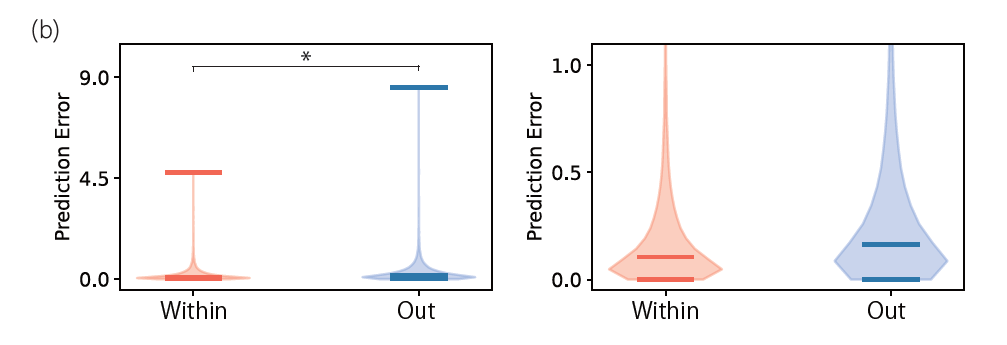

In [ ]:
df_Temp20to30 = dd.read_csv(r"df_Temp20to30.csv",assume_missing=True).compute()
df_Temp20to30["Expression_Diff"] = abs( (df_Temp20to30["Expression"]) - (df_Temp20to30["FIT_Reference_Value"]))

In [ ]:
df_U20_Over30 = df_Temp20to30[ (df_Temp20to30["Temperature"] > 30) | (df_Temp20to30["Temperature"] < 20) ]
df_Inrange = df_Temp20to30[ (df_Temp20to30["Temperature"] > 20) & (df_Temp20to30["Temperature"] < 30) ]

In [ ]:
# 各ALTCのGeneごとにRMSEを算出する
def calculate_rmse(group):
    actual = group['Expression']
    predicted = group['FIT_Reference_Value']
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

RMSE_U20_Over30 = df_U20_Over30.groupby(['Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_Inrange = df_Inrange.groupby(['Gene']).apply(calculate_rmse).reset_index(name='RMSE')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

vio = ax.violinplot([RMSE_U20_Over30["RMSE"], RMSE_Inrange["RMSE"]], showmedians=True, widths=0.7)

for IO , body in zip((["in" , "out"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "in":
        body.set_color("tomato")        
        
    else:
        body.set_color('cornflowerblue')
    
    body.set_linewidth(1)

ax.set_xticks([1, 2])
labels = ["Within" , "Out"]
ax.set_xticklabels(labels)

plt.ylabel("RMSE", fontsize=13)
ax.set_yticks([0 , 2 , 4])
ax.set_ylim(-0.5, 4.5)
plt.tick_params(labelsize=13)



plt.savefig(r"Fig\\Train_20to30_PrdErr.svg" , dpi = 2000)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

vio = ax.violinplot([RMSE_U20_Over30["RMSE"] , RMSE_Inrange["RMSE"]] , showmedians=True, widths=0.7)

for IO , body in zip((["in" , "out"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "in":
        body.set_color("tomato")        
        
    else:
        body.set_color('cornflowerblue')
    
    body.set_linewidth(1)

ax.set_xticks([1, 2])
labels = ["Within" , "Out"]
ax.set_xticklabels(labels)

ax.set_ylim(-0.05, 1.1)
ax.set_yticks([0 , 0.5 , 1.0])
plt.ylabel("RMSE", fontsize=13)

plt.tick_params(labelsize=13)
plt.savefig(r"Fig\\Train_20to30_Zoom0to1_PrdErr.svg" , dpi = 2000)

In [ ]:
Inrange_OutRange_Temp_Utest = stats.mannwhitneyu(df_Inrange["Expression_Diff"] , df_U20_Over30["Expression_Diff"], alternative='two-sided')

print("Mann-Whitney U test with DayTrainingData , Day and Night")
print(Inrange_OutRange_Temp_Utest)

# Fig.7c,d Correlation coefficient and RMSE on FIT model for each sample size created with measured data.

In [ ]:
df_CorrRMSE_Path = r"MeasurementResult\df_CorrRMSE_Measurement.csv"

df = dd.read_csv(df_CorrRMSE_Path,assume_missing=True).compute()

df = ExtractEnvCount_FromALTC(df)

In [ ]:
df_gb_CorrMean = df.groupby(["ALTC",'EnvCount'], as_index=False).mean(numeric_only=True)

In [ ]:
Corr_PlotList = []
RMSE_PlotList = []

for EnvCount in (["1","3","08","24","73"]):
    
    df_filter = df_gb_CorrMean[df_gb_CorrMean["EnvCount"] == EnvCount]
    
    Corr_PlotList.append(list(df_filter["Corr_ReferenceMeasurement"]))
    RMSE_PlotList.append(list(df_filter["RMSE_CorrecrtMeasurement"]))

In [ ]:
Corr_PlotList_SampleSize = [(Corr_PlotList[0]) , (Corr_PlotList[1]) , (Corr_PlotList[2]) , (Corr_PlotList[3]) , (Corr_PlotList[4])]

fig, ax = plt.subplots(figsize=(5, 3))

plt.tick_params(labelsize=13)
ax.violinplot(Corr_PlotList_SampleSize, showmedians=True)

ax.set_title('Sample size and Correlation coefficient', fontsize=10)

plt.ylabel("Correlation Coefficient", fontsize=13)
plt.xlabel("Sample size of training data", fontsize=13)

ax.set_xticks([1, 2, 3 , 4 , 5])
labels = ["12","36","96","288","876"]
ax.set_xticklabels(labels)

ax.set_yticks([0.0 , 0.2 , 0.4])
ax.set_ylim(-0.05, 0.5)

In [ ]:
SampleSize_12to36_Corr_Utest = stats.mannwhitneyu((Corr_PlotList[0]), (Corr_PlotList[1]), alternative='two-sided')
SampleSize_36to96_Corr_Utest = stats.mannwhitneyu((Corr_PlotList[1]), (Corr_PlotList[2]), alternative='two-sided')
SampleSize_96to288_Corr_Utest = stats.mannwhitneyu((Corr_PlotList[2]), (Corr_PlotList[3]), alternative='two-sided')

print("Mann-Whitney U test with sample sizes of 12 and 36")
print(SampleSize_12to36_Corr_Utest)

print("Mann-Whitney U test with sample sizes of 36 and 96")
print(SampleSize_36to96_Corr_Utest)

print("Mann-Whitney U test with sample sizes of 96 and 288")
print(SampleSize_96to288_Corr_Utest)

In [ ]:
RMSE_PlotList_SampleSize = [(RMSE_PlotList[0]) , (RMSE_PlotList[1]) , (RMSE_PlotList[2]) , (RMSE_PlotList[-2]) , (RMSE_PlotList[-1])]

fig, ax = plt.subplots(figsize=(5, 3))
plt.tick_params(labelsize=13)
ax.violinplot(RMSE_PlotList_SampleSize, showmedians=True)

ax.set_title('Sample size and RMSE', fontsize=13)

plt.ylabel("RMSE", fontsize=13)
ax.set_yticks([6.5 , 7.5 , 8.5])
ax.set_ylim(6.5, 8.7)

plt.xlabel("Sample size of training data", fontsize=13)
ax.set_xticks([1, 2, 3 , 4 , 5])
labels = ["12","36","96","288","876"]
ax.set_xticklabels(labels)

In [ ]:
SampleSize_12to36_RMSE_Utest = stats.mannwhitneyu((RMSE_PlotList[0]), (RMSE_PlotList[1]), alternative='two-sided')
SampleSize_36to96_RMSE_Utest = stats.mannwhitneyu((RMSE_PlotList[1]), (RMSE_PlotList[2]), alternative='two-sided')
SampleSize_96to288_RMSE_Utest = stats.mannwhitneyu((RMSE_PlotList[2]), (RMSE_PlotList[-2]), alternative='two-sided')

print("Mann-Whitney U test with sample sizes of 12 and 36")
print(SampleSize_12to36_RMSE_Utest)

print("Mann-Whitney U test with sample sizes of 36 and 96")
print(SampleSize_36to96_RMSE_Utest)

print("Mann-Whitney U test with sample sizes of 96 and 288")
print(SampleSize_96to288_RMSE_Utest)

# Fig 8 : Impact on the prediction of gene expression levels in rice.

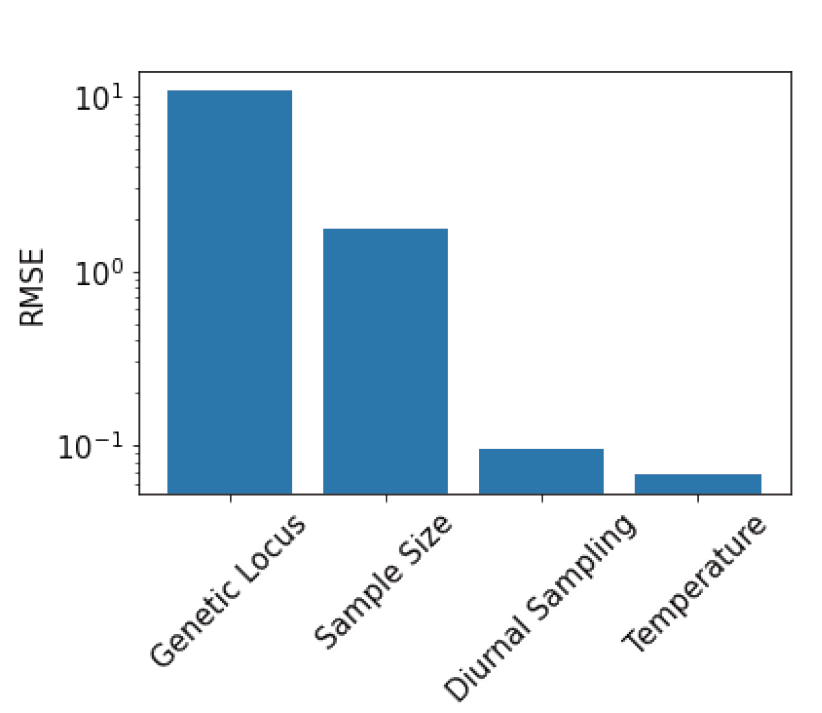

## Genetic Locus

In [ ]:
df_CorrRMSE_Path = r"df_CorrRMSE.csv"

df = dd.read_csv(df_CorrRMSE_Path,assume_missing=True).compute()

df = ExtractEnvCount_FromALTC(df)
df = df[ (df["EnvCount"] != "08Night") & (df["EnvCount"] != "08Day")]

In [ ]:
df_Gene_gb = df.groupby(['Gene'] , as_index=False).mean(numeric_only=True)
Gene_Acc_MaxMin = max(list(df_Gene_gb["RMSE"])) - min(list(df_Gene_gb["RMSE"]))

## Sample Size

In [ ]:
df_CorrRMSE_Path = r"df_CorrRMSE.csv"

df = dd.read_csv(df_CorrRMSE_Path,assume_missing=True).compute()

df = ExtractEnvCount_FromALTC(df)
df = df[ (df["EnvCount"] != "08Night") & (df["EnvCount"] != "08Day")]

In [ ]:
df_EnvCount_gb = df.groupby(['EnvCount'] , as_index=False).mean(numeric_only=True)

## Diurnal Sampling

In [ ]:
df_CorrRMSE_Path = r"df_CorrRMSE.csv"

df = dd.read_csv(df_CorrRMSE_Path,assume_missing=True).compute()

df = ExtractEnvCount_FromALTC(df)
df_Light_Dark = df[ (df["EnvCount"] == "08Night") | (df["EnvCount"] == "08Day")]
df_Control = df[ (df["EnvCount"] == "08")]

In [ ]:
df_Light_Dark_EnvGB = df_Light_Dark.groupby(['EnvCount'] , as_index=False).mean(numeric_only=True)
df_Control_EnvGB = df_Control.groupby(['EnvCount'] , as_index=False).mean(numeric_only=True)

In [ ]:
abs( ((1.409291 + 1.343748) / 2) - 1.280168)

## Temperature

In [ ]:
df = dd.read_csv(r"df_SamplingInOutRange.csv",assume_missing=True).compute()

df_8_Inrange = (df[(df["EnvCount"] == 8) & (df["InSamplingRange"] == 1)])
df_8_OutRange = (df[(df["EnvCount"] == 8) & (df["InSamplingRange"] != 1)])

In [ ]:
def calculate_rmse(group):
    actual = group['FIT_Reference_Value']
    predicted = group['FIT_Test_Value']
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

RMSE_df_Inrange = df_8_Inrange.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_Outrange = df_8_OutRange.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')

In [ ]:
diff = abs((statistics.mean(list(RMSE_df_Inrange["RMSE"]))) - (statistics.mean(list(RMSE_df_Outrange["RMSE"]))))

In [ ]:
print(diff)

## plot

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
x = np.array(["Gene" , "Sample size" , "Diurnal sampling", "Temperature"]) # 横軸の値
y = np.array([10.878255087767487, 1.7215440000000002, 0.09635150000000015, 0.06735912726793303]) # 棒の高さ

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)

plt.xticks(rotation=45)


ax.set_ylabel("RMSE" , fontsize = 30)
ax.set_yscale('log')

ax.tick_params(labelsize=50)

ax.bar(x, y)

#plt.savefig(r"fig//Effect.jpg" , dpi=2000, bbox_inches='tight')
plt.savefig(r"fig//Effect.pdf", transparent=True ,  bbox_inches='tight' , dpi=2000)
plt.show()

# Supplemental figure1.Counts of cases in each day exceeding the threshold for the correlation coefficient and RMSE in each sample size simulation sampling conditons.

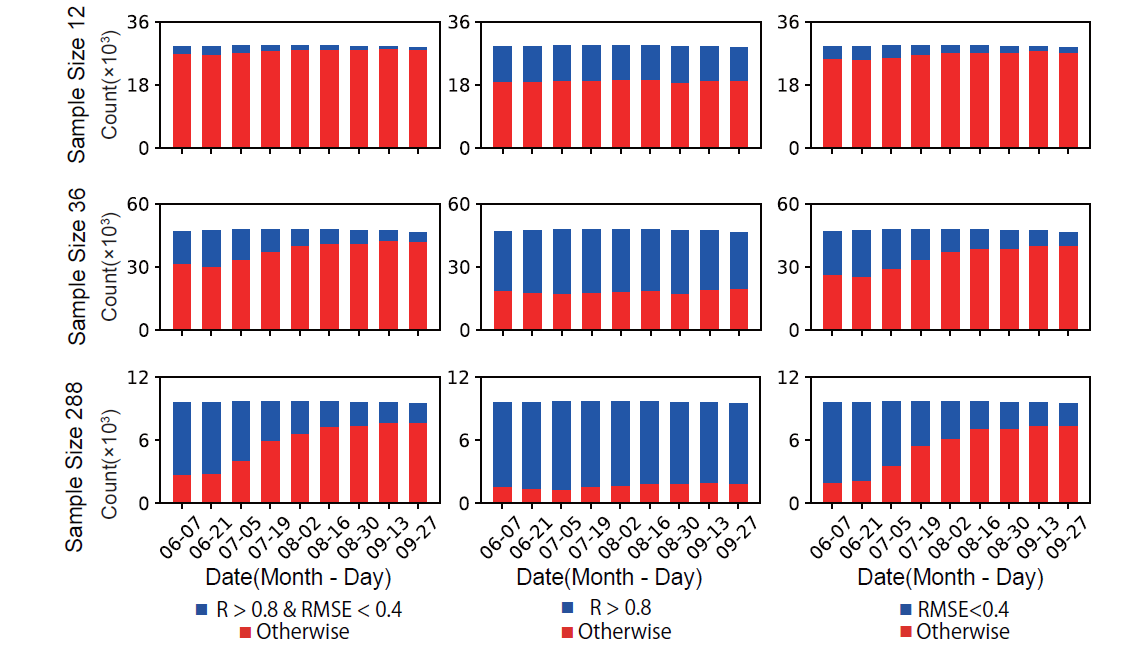

In [ ]:
df_TimeStep_Path =  r"df_Pridiciton_Success_Day.csv"
df = dd.read_csv(df_TimeStep_Path , assume_missing=True, dtype = 'object').compute()
df = ExtractEnvCount_FromALTC(df)

# Exclude the corr which can not def
df = df.dropna(how='any')

df = df[['Date(NoHour)','Corr_Success','RMSE_Success', 'Pridiciton_Success', 'EnvCount']]

In [ ]:
#/**
# * @Parameter DATAFRAME(data.frame) Filtered by EnvCount , FILTERING_COLUMN(str)
# * Count the number of genes successfully and unsuccessfully predicted for each date, based on FILTERING_COLUMN(Corr,RMSE), and return df
# * @return data.frame
# */

def Make_SuccessFail_Countdf(DATAFRAME , FILTERING_COLUMN):
    
    df_gb = DATAFRAME.groupby(['Date(NoHour)',FILTERING_COLUMN], as_index=False).count()
    df_gb = df_gb[['Date(NoHour)', FILTERING_COLUMN ,'EnvCount']]
    df_gb = df_gb.rename(columns={'EnvCount': "Count"})

    df_gb = pd.pivot_table(df_gb, values='Count', index='Date(NoHour)', columns = FILTERING_COLUMN , fill_value=0)
    df_gb.reset_index()
    
    return df_gb 

In [ ]:
df_01 = df[df["EnvCount"] == "1"]
df_03 = df[df["EnvCount"] == "3"]
df_24 = df[df["EnvCount"] == "24"]

In [ ]:
df_01_gb_Corr = Make_SuccessFail_Countdf(df_01 , 'Corr_Success')
df_01_gb_RMSE = Make_SuccessFail_Countdf(df_01 , 'RMSE_Success')
df_01_gb_All = Make_SuccessFail_Countdf(df_01 , 'Pridiciton_Success')

df_03_gb_Corr = Make_SuccessFail_Countdf(df_03 , 'Corr_Success')
df_03_gb_RMSE = Make_SuccessFail_Countdf(df_03 , 'RMSE_Success')
df_03_gb_All = Make_SuccessFail_Countdf(df_03 , 'Pridiciton_Success')

df_24_gb_Corr = Make_SuccessFail_Countdf(df_24 , 'Corr_Success')
df_24_gb_RMSE = Make_SuccessFail_Countdf(df_24 , 'RMSE_Success')
df_24_gb_All = Make_SuccessFail_Countdf(df_24 , 'Pridiciton_Success')

In [ ]:
def MakeFigure_SuccessFail(DATAFRAME , Xlabel1 , xLabel2 , xLabel3 , SAVEFOLDER , ENVCOUNT , DATATYPE):
    
    df = DATAFRAME.reset_index()
    df = df[['Date(NoHour)', '0', '1']]
    df['Date(NoHour)'] = df['Date(NoHour)'].str[5:]
    
    fig = plt.figure(figsize=(3.3,1.5))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   # こっちを先に書くこと。
    ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3（10の3乗）単位にする。
    
    # 積み上げ棒グラフの描画
    hist = ax.bar(df["Date(NoHour)"] , df["0"], color="red", label="red" , width = 0.6)
    hist = ax.bar(df["Date(NoHour)"] , df["1"], bottom = df["0"], color="blue", label="blue" , width = 0.6)
    
    # 軸ラベルの設定（適切なものに置き換えてください）
    #ax.set_xlabel("Date",fontsize=6)
    #ax.set_ylabel("Count",fontsize=6)
    
    ax.tick_params(labelsize=12)
    plt.xticks(rotation=45)

    ax.set_yticks([Xlabel1 , xLabel2 , xLabel3])
    ax.set_ylim(Xlabel1, xLabel3)
    
    SaveFileName = SAVEFOLDER + ENVCOUNT+ "_"  + DATATYPE + "_successes and failures by day.svg"
    plt.savefig(SaveFileName,dpi=1000)
    #plt.clf()
    #plt.close()

    
    return None

In [ ]:
MakeFigure_SuccessFail(df_01_gb_All , 0 , 18000 , 36000 , r"Fig\\" , "12" , "Corr_RMSE")
MakeFigure_SuccessFail(df_01_gb_Corr , 0 , 18000 , 36000 , r"Fig\\" , "12" , "Corr")
MakeFigure_SuccessFail(df_01_gb_RMSE , 0 , 18000 , 36000 , r"Fig\\" , "12" , "RMSE")

MakeFigure_SuccessFail(df_03_gb_All , 0 , 30000 , 60000 , r"Fig\\" , "36" , "Corr_RMSE")
MakeFigure_SuccessFail(df_03_gb_Corr , 0 , 30000 , 60000 , r"Fig\\" , "36" , "Corr")
MakeFigure_SuccessFail(df_03_gb_RMSE , 0 , 30000 , 60000 , r"Fig\\" , "36" , "RMSE")

MakeFigure_SuccessFail(df_24_gb_All , 0 , 6000 , 12000 , r"Fig\\" , "288" , "Corr_RMSE")
MakeFigure_SuccessFail(df_24_gb_Corr , 0 , 6000 , 12000 , r"Fig\\" , "288" , "Corr")
MakeFigure_SuccessFail(df_24_gb_RMSE , 0 , 6000 , 12000 , r"Fig\\" , "288" , "RMSE")

# supplemental Fig2 : Prediction success days and SD for each gene. Determination SD for 500 genes were computed from observed and predicted gene expression levels during the reference FIT model creation.

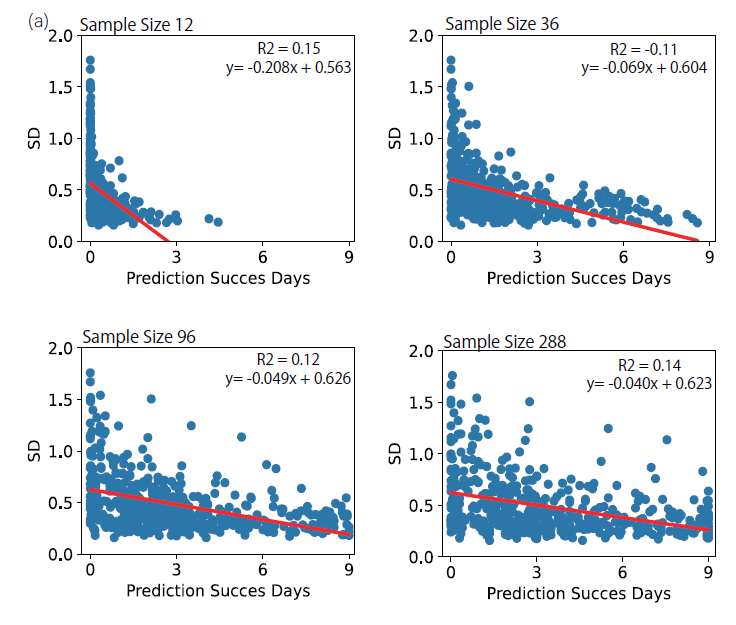

In [ ]:
def Calc_Pridiction_SuccessDay(DATAFRAME , COLUMN_NAME):
    
    df_gb = DATAFRAME.groupby(["EnvCount","ALTC" , 'Gene' , "Pridiciton_Success"], as_index=False).count()
    
    df_gb_SuccessDay9  = df_gb[ (df_gb["Pridiciton_Success"] == "1")]
    df_gb_SuccessDay9 = df_gb_SuccessDay9[["EnvCount",'ALTC', 'Gene', 'Date(NoHour)']]
    df_gb_SuccessDay9 = df_gb_SuccessDay9.rename(columns={'Date(NoHour)': COLUMN_NAME})
    
    df_gb_SuccessDay0  = df_gb[(df_gb["Pridiciton_Success"] == "0") & (df_gb["Date(NoHour)"] == 9)]
    df_gb_SuccessDay0 = df_gb_SuccessDay0[["EnvCount",'ALTC', 'Gene', 'Date(NoHour)']]
    df_gb_SuccessDay0 = df_gb_SuccessDay0.rename(columns={'Date(NoHour)': COLUMN_NAME})
    df_gb_SuccessDay0[COLUMN_NAME] = 0
    
    df_gb_all = pd.concat([df_gb_SuccessDay9 , df_gb_SuccessDay0])
    
    return df_gb_all

In [ ]:
df_TimeStep_Path =  r"df_Pridiciton_Success_Day.csv"
df = dd.read_csv(df_TimeStep_Path , assume_missing=True, dtype = 'object').compute()
df = ExtractEnvCount_FromALTC(df)
df = df[['ALTC', 'Gene','Date(NoHour)','Pridiciton_Success', 'EnvCount']]
df = df[(df["EnvCount"] != "08Day") & (df["EnvCount"] != "08Night")]

df_Pridicition_SuccessDay = Calc_Pridiction_SuccessDay(df , "Pridiction_Success_Day")

In [ ]:
df_SD = dd.read_csv(r"SD.csv" , assume_missing=True).compute()

In [ ]:
df_PD_gb = df_Pridicition_SuccessDay.groupby(["EnvCount","Gene"] , as_index = False).mean(numeric_only=True)

df_Merge = pd.merge(df_PD_gb , df_SD , on = "Gene" , how = "inner") 

df_1 = df_Merge[df_Merge["EnvCount"] == "1"]
df_3 = df_Merge[df_Merge["EnvCount"] == "3"]
df_8 = df_Merge[df_Merge["EnvCount"] == "08"]
df_24 = df_Merge[df_Merge["EnvCount"] == "24"]
df_73 = df_Merge[df_Merge["EnvCount"] == "73"]

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

model_lr_df1 = LinearRegression()

x = df_1["Pridiction_Success_Day"].values.reshape(-1, 1)
y = df_1["SD"].values.reshape(-1, 1)

model_lr_df1.fit(x,y)
ax.plot(x, model_lr_df1.predict(x), linestyle="solid" , color = 'red', linewidth=2)

ax.scatter(df_1["Pridiction_Success_Day"] , df_1["SD"])

ax.set_xlabel("Prediction Succes Days", fontsize=13)
ax.set_xlim(-0.3, 9.2)
ax.set_xticks([0 , 3 , 6 , 9])

ax.set_ylabel("SD", fontsize=13)
ax.set_ylim(0, 2.0)
ax.set_yticks([0 , 0.5 , 1 , 1.5 , 2.0])

plt.tick_params(labelsize=13)

#plt.savefig(r"C:\Users\danjp\Documents\NaganoLab\FIT_SamplingStrategy\230628_result_Analysis\MeasurementSD\Fig\SampleSize12_SD_PredictionScuccsesDay.svg")

In [ ]:
print('Regression Variables for Model Functions w1: %.3f' %model_lr_df1.coef_)
print('Intercept of model function w2: %.3f' %model_lr_df1.intercept_)
print('y= %.3fx + %.3f' % (model_lr_df1.coef_ , model_lr_df1.intercept_))
print('coefficient of determination R^2： ', model_lr_df1.score(x, y))

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

model_lr_df3 = LinearRegression()

x = df_3["Pridiction_Success_Day"].values.reshape(-1, 1)
y = df_3["SD"].values.reshape(-1, 1)

model_lr_df3.fit(x,y)
ax.plot(x, model_lr_df3.predict(x), linestyle="solid" , color = 'red', linewidth=2)


ax.scatter(df_3["Pridiction_Success_Day"] , df_3["SD"])

ax.set_xlabel("Prediction Succes Days", fontsize=13)
ax.set_xlim(-0.3, 9.2)
ax.set_xticks([0 , 3 , 6 , 9])

ax.set_ylabel("SD", fontsize=13)
ax.set_ylim(0, 2.0)
ax.set_yticks([0 , 0.5 , 1 , 1.5 , 2.0])


plt.tick_params(labelsize=13)


In [ ]:
print('Regression Variables for Model Functions w1: %.3f' %model_lr_df3.coef_)
print('Intercept of model function w2: %.3f' %model_lr_df3.intercept_)
print('y= %.3fx + %.3f' % (model_lr_df1.coef_ , model_lr_df3.intercept_))
print('coefficient of determination R^2： ', model_lr_df3.score(x, y))

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

model_lr_df8 = LinearRegression()

x = df_8["Pridiction_Success_Day"].values.reshape(-1, 1)
y = df_8["SD"].values.reshape(-1, 1)

model_lr_df8.fit(x,y)
ax.plot(x, model_lr_df8.predict(x), linestyle="solid" , color = 'red', linewidth=2)


ax.scatter(df_8["Pridiction_Success_Day"] , df_8["SD"])

ax.set_xlabel("Prediction Succes Days", fontsize=13)
ax.set_xlim(-0.3, 9.2)
ax.set_xticks([0 , 3 , 6 , 9])

ax.set_ylabel("SD", fontsize=13)
ax.set_ylim(0, 2.0)
ax.set_yticks([0 , 0.5 , 1 , 1.5 , 2.0])

plt.tick_params(labelsize=13)

#plt.savefig(r"C:\Users\danjp\Documents\NaganoLab\FIT_SamplingStrategy\230628_result_Analysis\MeasurementSD\Fig\SampleSize98_SD_PredictionScuccsesDay.svg")

In [ ]:
print('Regression Variables for Model Functions w1: %.3f' %model_lr_df8.coef_)
print('Intercept of model function w2: %.3f' %model_lr_df8.intercept_)
print('y= %.3fx + %.3f' % (model_lr_df1.coef_ , model_lr_df8.intercept_))
print('coefficient of determination R^2： ', model_lr_df8.score(x, y))

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))


model_lr_df24 = LinearRegression()

x = df_24["Pridiction_Success_Day"].values.reshape(-1, 1)
y = df_24["SD"].values.reshape(-1, 1)

model_lr_df24.fit(x,y)
ax.plot(x, model_lr_df24.predict(x), linestyle="solid" , color = 'red', linewidth=2)


ax.scatter(df_24["Pridiction_Success_Day"] , df_24["SD"])


ax.set_xlabel("Prediction Succes Days", fontsize=13)
ax.set_xlim(-0.3, 9.25)
ax.set_xticks([0 , 3 , 6 , 9])

ax.set_ylabel("SD", fontsize=13)
ax.set_ylim(0, 2.0)
ax.set_yticks([0 , 0.5 , 1 , 1.5 , 2.0])

plt.tick_params(labelsize=13)

#plt.savefig(r"C:\Users\danjp\Documents\NaganoLab\FIT_SamplingStrategy\230628_result_Analysis\MeasurementSD\Fig\SampleSize244_SD_PredictionScuccsesDay.svg")

In [ ]:
print('Regression Variables for Model Functions w1: %.3f' %model_lr_df24.coef_)
print('Intercept of model function w2: %.3f' %model_lr_df24.intercept_)
print('y= %.3fx + %.3f' % (model_lr_df1.coef_ , model_lr_df24.intercept_))
print('coefficient of determination R^2： ', model_lr_df24.score(x, y))

# supplemental Fig3 a,b : Time series plots with 􏚺 days of predicted success in the control condition and 9 days of predicted success in the light dark only condition.

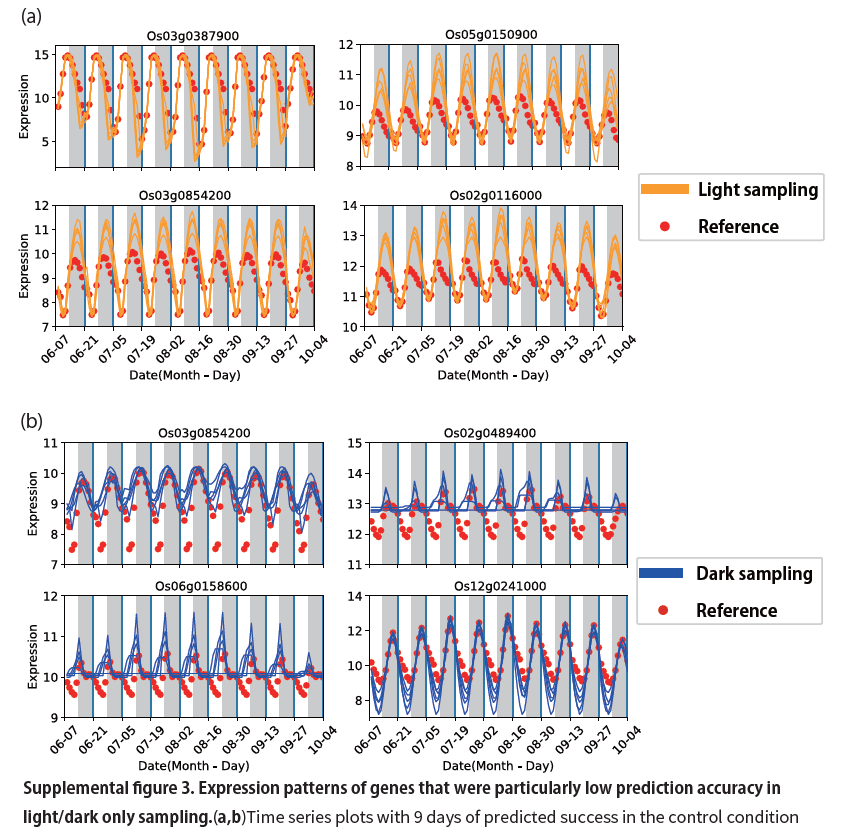

In [ ]:
# MainExpression Data
df = dd.read_csv(r"df_all_fit_filterd.csv", dtype={'EnvCount': 'object' , 'Time' : int , 'FIT_Test_Value' : float ,'FIT_Correct_Value' : float}).compute()
df = df[ (df["EnvCount"] == "08Day") | (df["EnvCount"] == "08Night")]
df = df[['Time', 'Gene', 'FIT_Test_Value', 'ALTC','FIT_Reference_Value']]

In [ ]:
# Prediciton Succsess day
df_Prd_Suc_Day = dd.read_csv(r"df_Pridiciton_Success_Day.csv" , assume_missing=True, dtype = 'object').compute()
df_Prd_Suc_Day = ExtractEnvCount_FromALTC(df_Prd_Suc_Day)
df_Prd_Suc_Day = df_Prd_Suc_Day[['ALTC', 'Gene','Date(NoHour)','Pridiciton_Success', 'EnvCount']]

# Extract target sampling sim.
df_08 = df_Prd_Suc_Day[df_Prd_Suc_Day["EnvCount"] == "08"]
df_08Night = df_Prd_Suc_Day[df_Prd_Suc_Day["EnvCount"] == "08Night"]
df_08Day = df_Prd_Suc_Day[df_Prd_Suc_Day["EnvCount"] == "08Day"]

In [ ]:
#/**
# * @Parameter DATAFRAME(data.frame) , COLUMN_NAME(str)
# * DATAFRAME is Prediciton Succsess day
# * Calculate the number of days of predicted success for each ALTC and Gene
# * @return None
# */

def Calc_Pridiction_SuccessDay(DATAFRAME , COLUMN_NAME):
    
    df_gb = DATAFRAME.groupby(["ALTC" , 'Gene' , "Pridiciton_Success"], as_index=False).count()
    
    df_gb_SuccessDay9  = df_gb[ (df_gb["Pridiciton_Success"] == "1")]
    df_gb_SuccessDay9 = df_gb_SuccessDay9[['ALTC', 'Gene', 'Date(NoHour)']]
    df_gb_SuccessDay9 = df_gb_SuccessDay9.rename(columns={'Date(NoHour)': COLUMN_NAME})
    
    df_gb_SuccessDay0  = df_gb[(df_gb["Pridiciton_Success"] == "0") & (df_gb["Date(NoHour)"] == 9)]
    df_gb_SuccessDay0 = df_gb_SuccessDay0[['ALTC', 'Gene', 'Date(NoHour)']]
    df_gb_SuccessDay0 = df_gb_SuccessDay0.rename(columns={'Date(NoHour)': COLUMN_NAME})
    df_gb_SuccessDay0[COLUMN_NAME] = 0
    
    df_gb_all = pd.concat([df_gb_SuccessDay9 , df_gb_SuccessDay0])
    
    return df_gb_all

In [ ]:
df_08_gb = Calc_Pridiction_SuccessDay(df_08 , "Pridiction_Success_Control")
df_08Night_gb = Calc_Pridiction_SuccessDay(df_08Night , "Pridiction_Success_Night")
df_08Day_gb = Calc_Pridiction_SuccessDay(df_08Day , "Pridiction_Success_Day")

df_08_gb['ALTC_Number'] = df_08_gb['ALTC'].str[-3:]
df_08Day_gb['ALTC_Number'] = df_08Day_gb['ALTC'].str[-3:]
df_08Night_gb['ALTC_Number'] = df_08Night_gb['ALTC'].str[-3:]

In [ ]:
df_08DayCon_gb = pd.merge(df_08_gb , df_08Day_gb , how = "inner" , on = ["ALTC_Number" , "Gene"])
df_08NightCon_gb = pd.merge(df_08_gb , df_08Night_gb , how = "inner" , on = ["ALTC_Number" , "Gene"])

df_08DayCon_gb = df_08DayCon_gb.astype({'Pridiction_Success_Control': int , "Pridiction_Success_Day" : int})
df_08NightCon_gb = df_08NightCon_gb.astype({'Pridiction_Success_Control': int , "Pridiction_Success_Night" : int})

In [ ]:
# Filter by gene name and ALTC, extract the top 5 rows, and create a new dataframe
def Filtering_Dataframe(DATAFRAME , GENELIST):
    
    df_ALTC_Gene_List = []
    
    DATAFRAME = DATAFRAME[["Gene" , "ALTC_y"]]
    
    for Gene in GENELIST:
        
        # 遺伝子のフィルタリング
        df_tmp = DATAFRAME[DATAFRAME["Gene"] == Gene]
        df_tmp = df_tmp.sort_values("ALTC_y" , ascending=True)
        df_tmp = df_tmp[:5]
        df_ALTC_Gene_List.append(df_tmp)
    
    df_ALTC_Gene = pd.concat(df_ALTC_Gene_List)
    df_ALTC_Gene = df_ALTC_Gene.rename({"ALTC_y":"ALTC"}, axis='columns')
    
    return df_ALTC_Gene 

def Make_Gene_ATLC_2DGeneExp_Supported_df(DATAFRAME , DATAFRAME_ANALYSIS):
    
    df_Analysis_2d = DATAFRAME_ANALYSIS.values.tolist()
    
    ExpList_2d = []
    
    for i in range(len(df_Analysis_2d)):
    
        SingleList = df_Analysis_2d[i] 
        
        Gene = SingleList[0]
        ALTC = SingleList[1]
        
        df_tmp = DATAFRAME[ (DATAFRAME["ALTC"] == ALTC) & (DATAFRAME["Gene"] == Gene)]
        df_tmp = df_tmp.sort_values("Time")
        ExpList_2d.append(list(df_tmp["FIT_Test_Value"]))
    
    DATAFRAME_ANALYSIS["ListNumber"] = [i for i in range(0,len(DATAFRAME_ANALYSIS))]
    
    return ExpList_2d , DATAFRAME_ANALYSIS

def Plot_Figure(DATAFRAME, ALTC_LIST, GENEEXP_NUMLIST, EXPLIST_2D, GENE, DATATYPE , COLOR):
    
    plt.rcParams['figure.subplot.bottom'] = 0.15
    plt.rcParams['lines.linewidth'] = 3

    plt.rcParams["font.size"] = 10

    fig = plt.figure(figsize=(5, 2.5))
    ax = fig.add_subplot(1, 1, 1)

    Correct_FIT_Expression = list((DATAFRAME[(DATAFRAME["ALTC"] == ALTC_LIST[0]) & (DATAFRAME["Gene"] == GENE)])["FIT_Reference_Value"])
    All_List = (EXPLIST_2D[(GENEEXP_NUMLIST[0])]) + (EXPLIST_2D[(GENEEXP_NUMLIST[1])]) + (EXPLIST_2D[(GENEEXP_NUMLIST[2])]) + (EXPLIST_2D[(GENEEXP_NUMLIST[3])]) + (EXPLIST_2D[(GENEEXP_NUMLIST[4])]) + Correct_FIT_Expression

    y_min = math.floor(min(All_List))
    y_max = math.ceil(max(All_List))

    ax.set_ylim(y_min, y_max)
    ax.set_xticks([0, 12, 24, 36, 48, 60, 72, 84, 96, 108])
    ax.set_xlim(0, 108)
    ax.set_xticklabels(["06-07", "06-21", "07-05", "07-19", "08-02", "08-16", "08-30", "09-13", "09-27", "10-04"], rotation=45, fontsize=13)

    plt.vlines(12, 0, 20, lw=1.1)
    plt.vlines(24, 0, 20, lw=1.1)
    plt.vlines(36, 0, 20, lw=1.1)
    plt.vlines(48, 0, 20, lw=1.1)
    plt.vlines(60, 0, 20, lw=1.1)
    plt.vlines(72, 0, 20, lw=1.1)
    plt.vlines(84, 0, 20, lw=1.1)
    plt.vlines(96, 0, 20, lw=1.1)
    plt.vlines(108, 0, 20, lw=1.1)
    
    ax.fill_between([6, 12], 0, 20, color='lightgrey', alpha=1)
    ax.fill_between([18, 24], 0, 20, color='lightgrey', alpha=1)
    ax.fill_between([30, 36], 0, 20, color='lightgrey', alpha=1)
    ax.fill_between([42, 48], 0, 20, color='lightgrey', alpha=1)
    ax.fill_between([54, 60], 0, 20, color='lightgrey', alpha=1)
    ax.fill_between([66, 72], 0, 20, color='lightgrey', alpha=1)
    ax.fill_between([78, 84], 0, 20, color='lightgrey', alpha=1)
    ax.fill_between([90, 96], 0, 20, color='lightgrey', alpha=1)
    ax.fill_between([102, 108], 0, 20, color='lightgrey', alpha=1)

    ax.set_xlabel("Date(Month - Day)", fontsize=13)
    ax.set_ylabel("Expression", fontsize=13)

    plt.tick_params(labelsize=13)

    Index_List = [i for i in range(1, 109)]

    ax.scatter(Index_List, Correct_FIT_Expression, color='red', label="Reference", marker='o', s=30)

    ax.plot(Index_List, EXPLIST_2D[(GENEEXP_NUMLIST[0])], color=COLOR, label=ALTC_LIST[0], lw=0.75)
    ax.plot(Index_List, EXPLIST_2D[(GENEEXP_NUMLIST[1])], color=COLOR, label=ALTC_LIST[1], lw=0.75)
    ax.plot(Index_List, EXPLIST_2D[(GENEEXP_NUMLIST[2])], color=COLOR, label=ALTC_LIST[2], lw=0.75)
    ax.plot(Index_List, EXPLIST_2D[(GENEEXP_NUMLIST[3])], color=COLOR, label=ALTC_LIST[3], lw=0.75)
    ax.plot(Index_List, EXPLIST_2D[(GENEEXP_NUMLIST[4])], color=COLOR, label=ALTC_LIST[4], lw=0.75)

    ax.set_title(GENE + " " + DATATYPE, fontsize=13)

    plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', fontsize=13)
    plt.show()
    plt.clf()
    plt.close()

    return None

def Get_ALTC_Gene_Plot(GENE_LIST , DATAFRAME_GENE_ALTC , DATAFRAME_GENEEXP ,  EXPLIST_2D , DATATYPE , COLOR):
    
    for Gene in GENE_LIST:
        
        df_tmp = DATAFRAME_GENE_ALTC[DATAFRAME_GENE_ALTC["Gene"] == Gene]
        
        ALTC_List = list(df_tmp["ALTC"])
        GeneExp_NumList = list(df_tmp["ListNumber"])
        
        Plot_Figure(DATAFRAME_GENEEXP , ALTC_List , GeneExp_NumList , EXPLIST_2D  , Gene , DATATYPE , COLOR)

In [ ]:
df_Day0Con9_gb = df_08DayCon_gb[(df_08DayCon_gb["Pridiction_Success_Control"] == 9)& (df_08DayCon_gb["Pridiction_Success_Day"] == 0)]
df_Night0Con9_gb = df_08NightCon_gb[(df_08NightCon_gb["Pridiction_Success_Control"] == 9)& (df_08NightCon_gb["Pridiction_Success_Night"] == 0)]

In [ ]:
Con9Day0_Gene = df_Day0Con9_gb.groupby(['Gene', 'Pridiction_Success_Control'] , as_index=False).size()
Con9Day0_Gene = Con9Day0_Gene.sort_values("size" , ascending=False)
Con9Day0_Gene = list(Con9Day0_Gene["Gene"])[0:5]

In [ ]:
Con9Night0_Gene = df_Night0Con9_gb.groupby(['Gene', 'Pridiction_Success_Control'] , as_index=False).size()
Con9Night0_Gene = Con9Night0_Gene.sort_values("size" , ascending=False)
Con9Night0_Gene = list(Con9Night0_Gene["Gene"])[0:5]

In [ ]:
df_Con9Day0Analysis = Filtering_Dataframe(df_Day0Con9_gb , Con9Day0_Gene)
df_Con9Night0Analysis = Filtering_Dataframe(df_Night0Con9_gb , Con9Night0_Gene)

In [ ]:
Con9Day0_ExpList_2d , df_Con9Day0Analysis = Make_Gene_ATLC_2DGeneExp_Supported_df(df , df_Con9Day0Analysis)
Con9Night0_ExpList_2d , df_Con9Night0Analysis = Make_Gene_ATLC_2DGeneExp_Supported_df(df , df_Con9Night0Analysis)

In [ ]:
Get_ALTC_Gene_Plot(Con9Day0_Gene , df_Con9Day0Analysis , df ,  Con9Day0_ExpList_2d , "Con9Day0" , "orange")

In [ ]:
Get_ALTC_Gene_Plot(Con9Night0_Gene , df_Con9Night0Analysis , df ,  Con9Night0_ExpList_2d , "Con9Night0" , "blue")

# Sup Fig4a. Prediction error for 36 and 288 sample size simulation conditions within and outside the temperature range of the training

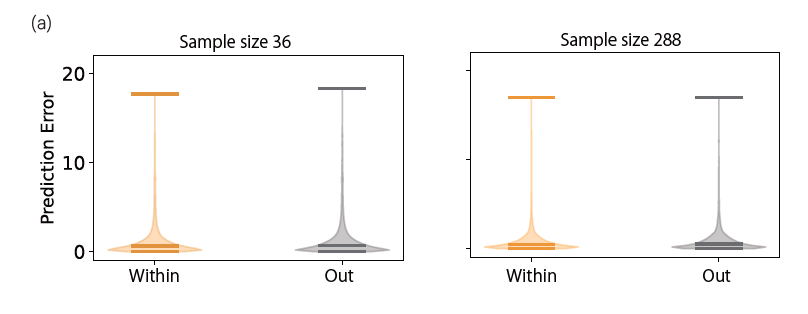

In [ ]:
df_Path =  r"df_all_fit_filterd.csv"

df = dd.read_csv(df_Path , assume_missing=True, dtype = 'object').compute()
df = df[ (df["EnvCount"] == "3") | (df["EnvCount"] == "08") | (df["EnvCount"] == "24")]
df = df[["Time",'FIT_Test_Value', 'ALTC', 'EnvCount' , 'Gene','Temperature', 'FIT_Reference_Value', 'DN']]
df = df.astype({'FIT_Test_Value': float , 'FIT_Reference_Value' : float})

In [ ]:
#/**
# * @Parameter DATAFRAME(data.frame) WeatherConditon data.frame used for each ALTC
# * Extract the highest and lowest sampling temperatures for each ALTC
# * @return data.frame
# */

def Creatdf_MaxMinTemperature_fromALTC(DATAFRAME , DATAFRAME_ENVID):
    
    df_ALTC_MaxMinTemp_List = []

    for ALTC in set(DATAFRAME["ALTC"]):
        
        df_tmp = DATAFRAME[DATAFRAME["ALTC"] == ALTC]
        EnvID_List = (df_tmp.iloc[0].to_list())[1:]
        
        Day_Temperature_List = []
        Night_Temperature_List = []  
        
        for EnvID in EnvID_List:
            
            df_EnvID_tmp = DATAFRAME_ENVID[DATAFRAME_ENVID["WeatherCondition"] == EnvID]
            
            Day_Temperature = (list(df_EnvID_tmp["LightTemperature"])[0])
            Night_Temperature = (list(df_EnvID_tmp["DarkTemperature"])[0])
            
            Day_Temperature_List.append(Day_Temperature)
            Night_Temperature_List.append(Night_Temperature)

        Day_Temperature_List = [int(float(i)) for i in Day_Temperature_List if i != "NaN" and not math.isnan(float(i))]
        Night_Temperature_List = [int(float(i)) for i in Night_Temperature_List if i != "NaN" and not math.isnan(float(i))]
        
        df_ALTC_MaxMinTemp_List.append([ALTC , "Day" , min(Day_Temperature_List) , max(Day_Temperature_List)])
        df_ALTC_MaxMinTemp_List.append([ALTC , "Night" , min(Night_Temperature_List) , max(Night_Temperature_List)])

    df_ALTC_MaxMinTemp = pd.DataFrame(df_ALTC_MaxMinTemp_List, columns=['ALTC', "DayNight" , "MinTemperature" , "MaxTemperature"])
    
    return df_ALTC_MaxMinTemp

In [ ]:
df_WeatherConditon_Path = r"Weather Conditon\WeatherConditon.csv"
df_36_WC_Path = r"Weather Conditon\SampleSize36_ALTC.csv"
df_288_WC_Path = r"Weather Conditon\Samplesize288_ALTC.csv"

df_EnvID = dd.read_csv(df_WeatherConditon_Path , assume_missing=True, dtype = 'object').compute()
df_3_EnvID = dd.read_csv(df_36_WC_Path , assume_missing=True, dtype = 'object').compute()
df_24_EnvID = dd.read_csv(df_288_WC_Path , assume_missing=True, dtype = 'object').compute()

# Creating a dataframe of minimum and maximum temperatures for all ALTCs
df_ALTC_MaxMinTemp_List = []

for dataframe in ([df_3_EnvID , df_24_EnvID]):
    
    df_tmp = Creatdf_MaxMinTemperature_fromALTC(dataframe , df_EnvID)
    df_ALTC_MaxMinTemp_List.append(df_tmp)

df_ALTC_MaxMinTemp = pd.concat(df_ALTC_MaxMinTemp_List)

In [ ]:
def in_sampling_range(row , DAY_MIN_TEMPERATURE , DAY_MAX_TEMPERATURE):
    
    if (DAY_MIN_TEMPERATURE <= row['Temperature'] ) and (row['Temperature'] <= DAY_MAX_TEMPERATURE ):
        return 1
    
    elif row['Temperature'] > DAY_MAX_TEMPERATURE:
        return 0
    
    else:
        return -1

In [ ]:
# Is the memory at 108 of each ALTC within the minimum temperature <= n <= maximum temperature?
df_wt_all_list = []

df_wt = df[["ALTC" , "Time" ,"DN","Temperature"]]
df_wt = df_wt.drop_duplicates(subset=["ALTC" , 'Time'])

df_wt = df_wt.astype({'Temperature': float})

for ALTC in list(set(df_ALTC_MaxMinTemp["ALTC"])):
    
    df_ALTC_MaxMinTemp_tmp = df_ALTC_MaxMinTemp[df_ALTC_MaxMinTemp["ALTC"] == ALTC]
    
    df_wt_day_tmp = df_wt[(df_wt["ALTC"] == ALTC) & (df_wt["DN"] == "Day")]
    df_wt_night_tmp = df_wt[(df_wt["ALTC"] == ALTC) & (df_wt["DN"] == "Night")]
        
    Day_Max_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Day"])["MaxTemperature"])[0]
    Day_Min_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Day"])["MinTemperature"])[0]
    
    Night_Max_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Night"])["MaxTemperature"])[0]
    Might_Min_Temperature = list((df_ALTC_MaxMinTemp_tmp[df_ALTC_MaxMinTemp_tmp["DayNight"] == "Night"])["MaxTemperature"])[0]
    
    if (len(df_wt_day_tmp) == 0) or (len(df_wt_night_tmp) == 0):
        pass
    else:
        df_wt_day_tmp['InSamplingRange'] = df_wt_day_tmp.apply(lambda row: in_sampling_range(row, Day_Min_Temperature, Day_Max_Temperature), axis=1)
        df_wt_night_tmp['InSamplingRange'] = df_wt_night_tmp.apply(lambda row: in_sampling_range(row, Might_Min_Temperature, Night_Max_Temperature), axis=1)
    
        df_wt_all_list.append(df_wt_day_tmp)
        df_wt_all_list.append(df_wt_night_tmp)

df_wt_all = pd.concat(df_wt_all_list)
df_wt_all = df_wt_all[["ALTC" , "Time","InSamplingRange"]]

In [ ]:
df_all = pd.merge(df , df_wt_all , on = ["ALTC","Time"] , how = "inner")
df_all["Expression_Diff"] = abs(df_all["FIT_Test_Value"] - df_all["FIT_Reference_Value"])

In [ ]:
df_3_Inrange = (df_all[(df_all["EnvCount"] == "3") & (df_all["InSamplingRange"] == 1)])
df_3_OutRange = (df_all[(df_all["EnvCount"] == "3") & (df_all["InSamplingRange"] != 1)])

df_24_Inrange = (df_all[(df_all["EnvCount"] == "24") & (df_all["InSamplingRange"] == 1)])
df_24_OutRange = (df_all[(df_all["EnvCount"] == "24") & (df_all["InSamplingRange"] != 1)])

In [ ]:
# 各ALTCのGeneごとにRMSEを算出する
def calculate_rmse(group):
    actual = group['FIT_Test_Value']
    predicted = group['FIT_Reference_Value']
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

RMSE_df_3_Inrange = df_3_Inrange.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_3_OutRange = df_3_OutRange.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')

RMSE_df_24_Inrange = df_24_Inrange.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')
RMSE_df_24_OutRange = df_24_OutRange.groupby(['ALTC', 'Gene']).apply(calculate_rmse).reset_index(name='RMSE')

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 3))
vio = ax.violinplot([list(RMSE_df_3_Inrange["RMSE"]) , list(RMSE_df_3_OutRange["RMSE"])] 
                    ,showmedians=True)

for IO , body in zip((["in" , "out"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "in":
        body.set_color("orange")        
        
    else:
        body.set_color('dimgrey')
    
    body.set_linewidth(1)

plt.tick_params(labelsize=14)

ax.set_xticks([1, 2])
labels = ["Within","Out"]
ax.set_xticklabels(labels, fontsize=14)
ax.set(xlabel=None)


ax.set_yticks([0.0 , 8 , 16])
ax.set_ylim(-1, 18)
plt.tick_params(labelsize=15)
plt.ylabel("RMSE", fontsize=14)

plt.savefig(r"Fig//Sampled_Unsampled_Temp_PrdAcc_36.svg" , dpi = 2000)

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 3))
vio = ax.violinplot([list(RMSE_df_24_Inrange["RMSE"]) , list(RMSE_df_24_OutRange["RMSE"])] 
                    ,showmedians=True)

for IO , body in zip((["in" , "out"]) ,vio['bodies']):
    
    print(IO , body)
    
    if IO == "in":
        body.set_color("orange")        
        
    else:
        body.set_color('dimgrey')
    
    body.set_linewidth(1)

plt.tick_params(labelsize=14)

ax.set_xticks([1, 2])
labels = ["Within","Out"]
ax.set_xticklabels(labels, fontsize=14)
ax.set(xlabel=None)


ax.set_yticks([0.0 , 8 , 16])
ax.set_ylim(-1, 18)
plt.tick_params(labelsize=15)
plt.ylabel("RMSE", fontsize=14)

plt.savefig(r"Fig//Sampled_Unsampled_Temp_PrdAcc_288.svg" , dpi = 2000)

# Sup Fig4b. Data count inside and outside the sampling temperature range per date in 36 and 288 sample size simulation conditions.

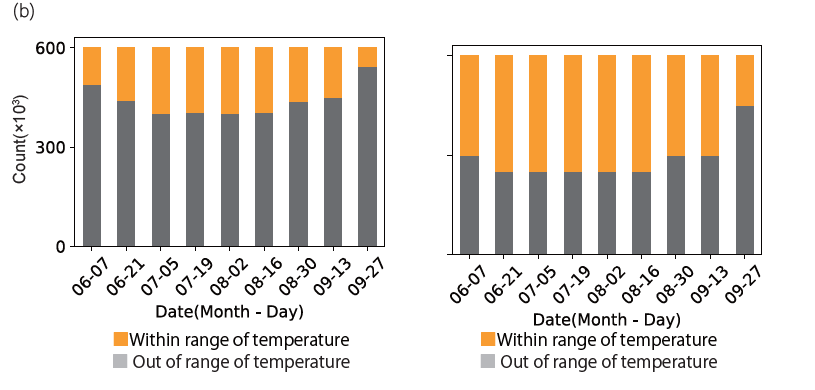

In [ ]:
df_path = r"df_SamplingInOutRange.csv"
df = dd.read_csv(df_path , assume_missing=True, dtype = 'object').compute()
df = df[["Time" , 'EnvCount','InSamplingRange']]

In [ ]:
dfat_path = r"df_all_fit_filterd.csv"
df_at = dd.read_csv(dfat_path , assume_missing=True, dtype = 'object').compute()
df_at = df_at[["Time" , "Date"]]
df_at = df_at.drop_duplicates()

df_at["Date"] = pd.to_datetime(df_at["Date"])
df_at["Date"] = df_at["Date"].dt.date

In [ ]:
df = pd.merge(df,df_at , on = "Time" , how = "inner")

In [ ]:
df_3 = df[df["EnvCount"] == "3"]
df_24 = df[df["EnvCount"] == "24"]

In [ ]:
df_3_gb = df_3.groupby(["Date" , 'InSamplingRange'], as_index=False).count()
df_3_gb = df_3_gb[["Date" , "InSamplingRange" , "EnvCount"]]
df_3_gb = df_3_gb.rename(columns={'EnvCoun': 'Count'})
df_3_gb['Date'] = pd.to_datetime(df_3_gb['Date'])
df_3_gb['Date'] = df_3_gb['Date'].dt.strftime('%m-%d')

df_24_gb = df_24.groupby(["Date" , 'InSamplingRange'], as_index=False).count()
df_24_gb = df_24_gb[["Date" , "InSamplingRange" , "EnvCount"]]
df_24_gb = df_24_gb.rename(columns={'EnvCoun': 'Count'})
df_24_gb['Date'] = pd.to_datetime(df_24_gb['Date'])
df_24_gb['Date'] = df_24_gb['Date'].dt.strftime('%m-%d')

In [ ]:
df_3_gb['InSamplingRange'] = df_3_gb['InSamplingRange'].replace("-1", "0")
df_3_gb = df_3_gb.groupby(['Date', 'InSamplingRange'], as_index=False).sum()

df_24_gb['InSamplingRange'] = df_24_gb['InSamplingRange'].replace("-1", "0")
df_24_gb = df_24_gb.groupby(['Date', 'InSamplingRange'], as_index=False).sum()

In [ ]:
# Group by 'Date' and 'InSamplingRange', then count occurrences (same as before)
grouped = df_3_gb.groupby(['Date', 'InSamplingRange'])['EnvCount'].sum().unstack(fill_value=0)

colors = ['dimgrey', 'orange']   # Order: -1, 0, 1

# Create a stacked histogram without normalization
fig, ax = plt.subplots(figsize=(4.5, 3))

ax.set_yticks([0, 300000, 600000])
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))  
ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   


grouped.plot(kind='bar', stacked=True, color=colors, ax=ax)

plt.xticks(rotation=45)

# Set plot labels and title
ax.set_xlabel('Date(Month - Day)' , fontsize = 13)
ax.set_ylabel('Count',  fontsize = 13)
#ax.set_title('Number of inside and outside the temperature range on each date_8Env')

# Hide the legend
ax.get_legend().remove()

ax.tick_params(labelsize=13)

# Show the plot
plt.savefig(r"Fig\\Number of inside and outside the temperature range on each date_36.svg", dpi=2000)
plt.show()


In [ ]:
# Group by 'Date' and 'InSamplingRange', then count occurrences (same as before)
grouped = df_24_gb.groupby(['Date', 'InSamplingRange'])['EnvCount'].sum().unstack(fill_value=0)

# -1が気温レンジ外(低温) 0が気温レンジ外(高温) 1が気温レンジ内
colors = ['dimgrey', 'orange']   # Order: -1, 0, 1

# Create a stacked histogram without normalization
fig, ax = plt.subplots(figsize=(4.5, 3))

ax.set_yticks([0, 300000, 600000])
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   # こっちを先に書くこと。
ax.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3単位の指数で表示する。


grouped.plot(kind='bar', stacked=True, color=colors, ax=ax)

plt.xticks(rotation=45)

# Set plot labels and title
ax.set_xlabel('Date(Month - Day)' , fontsize = 13)
ax.set_ylabel('Count',  fontsize = 13)
#ax.set_title('Number of inside and outside the temperature range on each date_8Env')

# Hide the legend
ax.get_legend().remove()

ax.tick_params(labelsize=13)

# Show the plot
plt.savefig(r"Fig\\Number of inside and outside the temperature range on each date_288.svg", dpi=2000)
plt.show()
